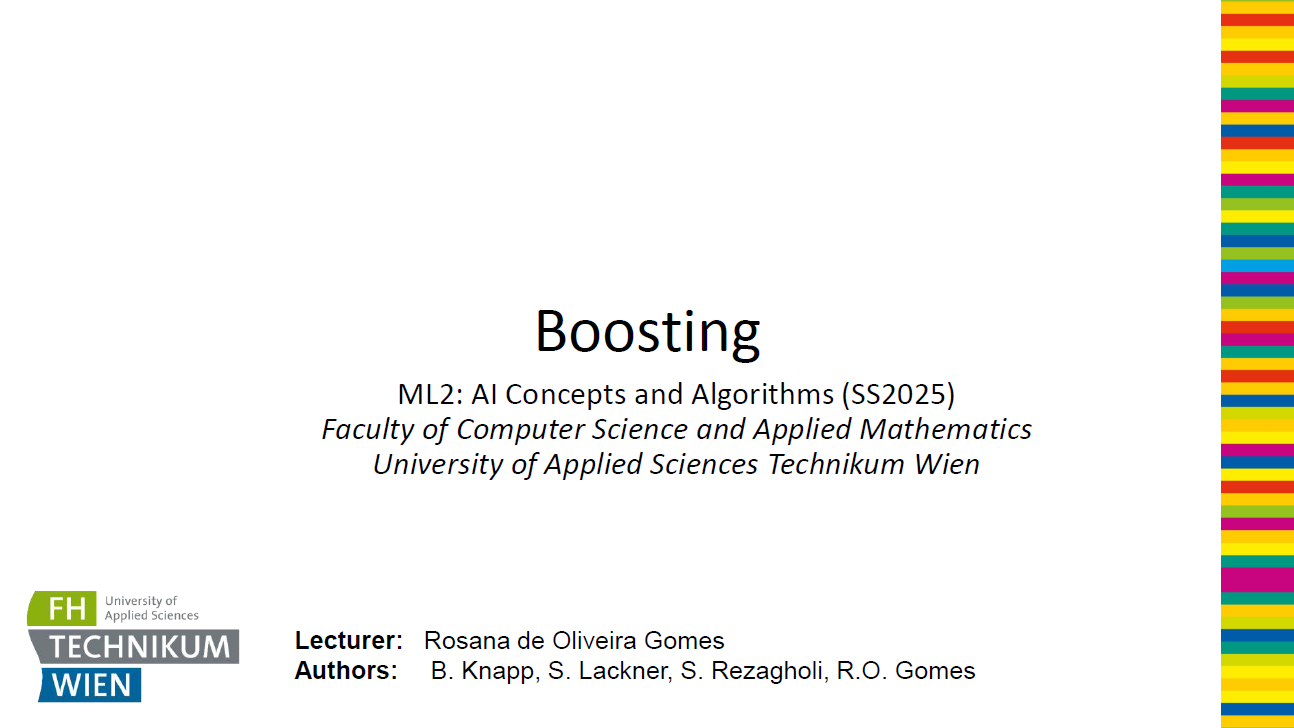

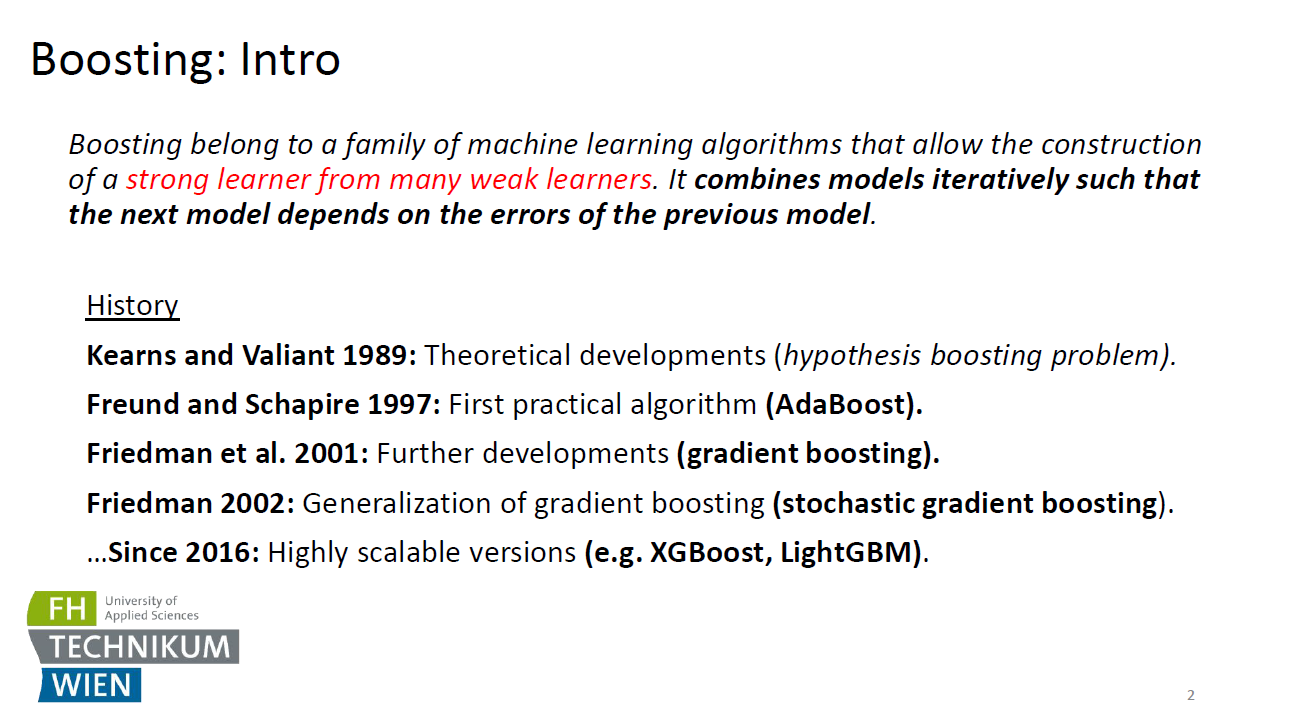


---

**Slide 2: Boosting – Introduction**

Good \[morning/afternoon], everyone.
Today we’re diving into one of the most powerful techniques in machine learning: **Boosting**.

Boosting belongs to a **family of ensemble algorithms** that aim to create a **strong learner by combining many weak learners**. What makes boosting unique is its iterative nature — each new model focuses on correcting the **errors of the previous one**. This concept of sequential learning significantly improves performance, especially in complex tasks.

Let’s take a quick look at the **history** of boosting:

* It all began in **1989**, when **Kearns and Valiant** posed a theoretical question known as the **hypothesis boosting problem**.
* A major breakthrough came in **1997**, when **Freund and Schapire** introduced the first practical algorithm, **AdaBoost**.
* In **2001**, **Friedman** and colleagues expanded the idea into what we now know as **gradient boosting**.
* By **2002**, Friedman proposed a more generalized form: **stochastic gradient boosting**, which incorporates randomness to improve generalization.
* Finally, since around **2016**, we’ve seen the emergence of **highly scalable implementations** such as **XGBoost** and **LightGBM**, which are widely used in real-world applications today.

We’ll explore all these developments in more detail throughout the session.
Please go ahead and share the next slide when you're ready.


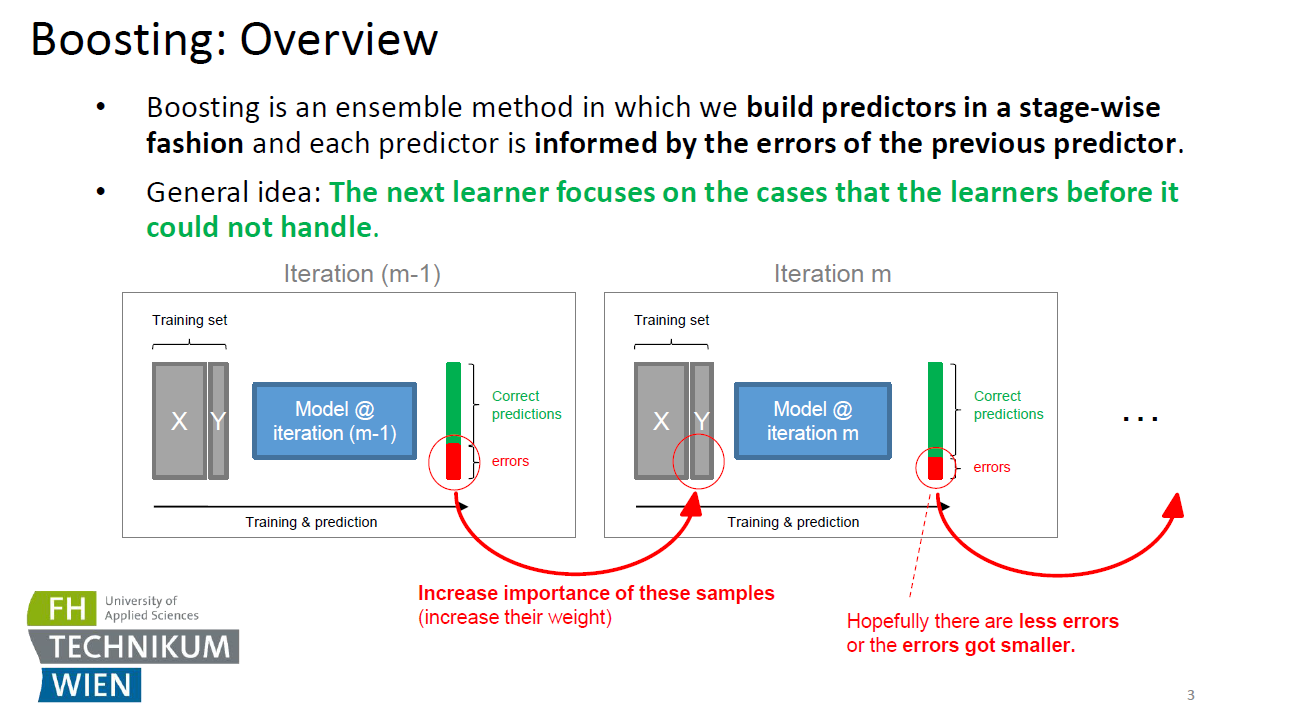

---

**Slide 3: Boosting – Overview**

Let’s now understand **how boosting actually works**.

Boosting is a form of **ensemble learning**. The idea is to build models **sequentially**, where **each new model is trained to correct the mistakes** of the previous ones.

Here's the key principle:

> *“The next learner focuses on the cases that the learners before it could not handle.”*

Let’s walk through the diagram:

* In **iteration (m−1)**, we train a model using the current data.

  * It makes some **correct predictions** (in green) and some **errors** (in red).
  * We **increase the importance** — or **weight** — of the samples that were predicted incorrectly. These now play a larger role in the next round of training.

* In **iteration m**, we train a new model, but now the algorithm pays **extra attention to the samples that were previously misclassified**.

  * Ideally, this new model **reduces the error** — either by misclassifying fewer samples or by lowering the severity of the mistakes.

This process continues, iteration after iteration, each model building on the errors of the previous, which allows boosting to progressively improve performance.

Ready for the next slide whenever you are!


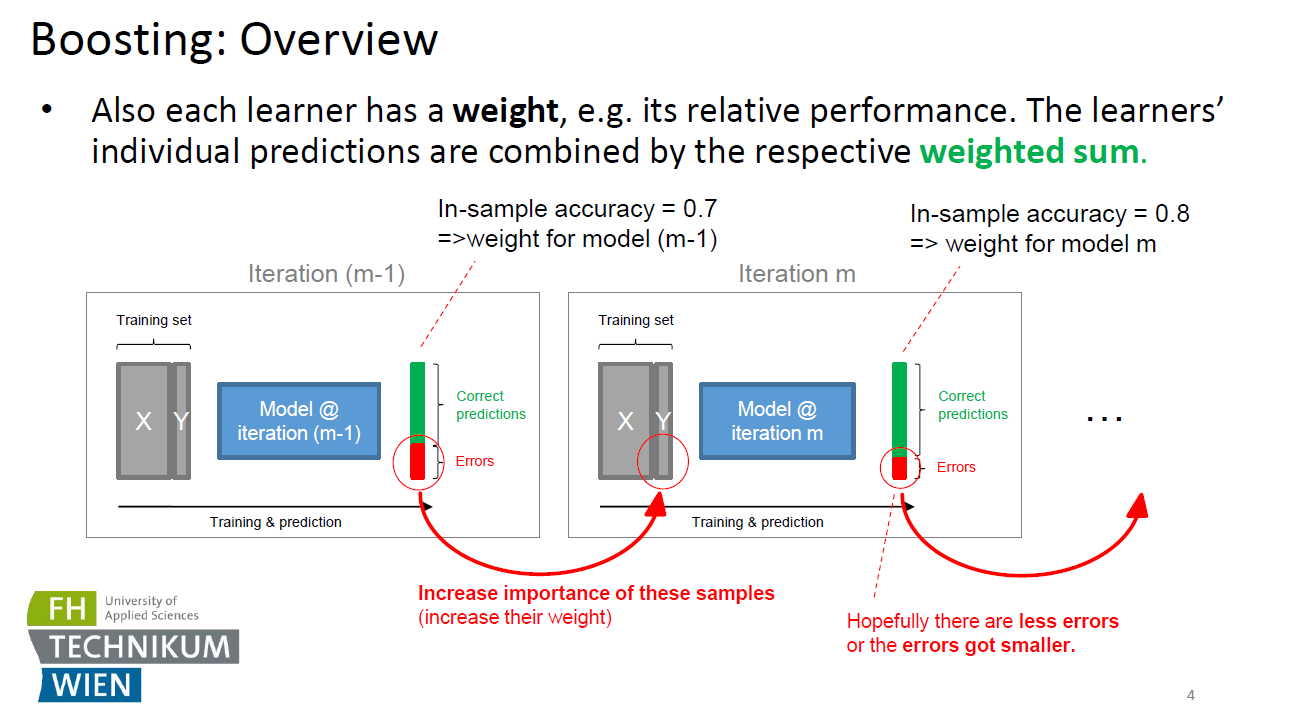

---

**Slide 4: Boosting – Weighted Learners**

Continuing from the previous concept, another key idea in boosting is that **not all learners contribute equally** to the final prediction. Each learner is assigned a **weight** based on how well it performed.

Let’s look at what this means:

* After training a model in iteration **(m−1)**, we compute its **in-sample accuracy** — let's say it correctly classified **70%** of the samples. This performance determines the **weight** it will receive when its predictions are combined with others.
* In the next round, iteration **m**, the new model performs better, say **80%** accuracy — and thus receives a **higher weight**.

All models make predictions, and these are **combined using a weighted sum**, meaning the better-performing models have **more influence** on the final decision.

This mechanism ensures that:

1. Mistakes are corrected by new learners, and
2. Stronger learners naturally play a bigger role in the ensemble's final output.

This process — learning from mistakes and giving more credit to strong predictors — is what makes boosting so effective.

Ready when you are for the next slide!


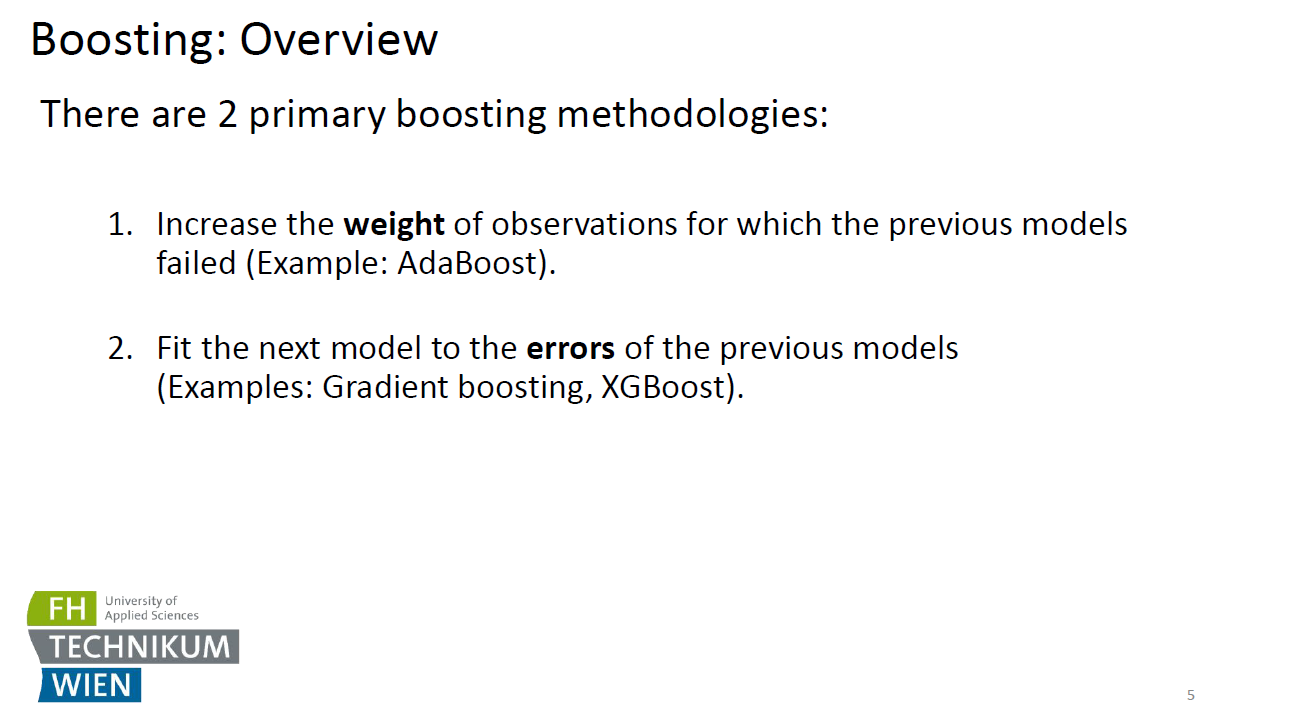

---

**Slide 5: Boosting – Two Main Methodologies**

Now let’s look at the **two primary methodologies** behind boosting.
Both share the same objective: *improving performance by focusing on past errors*, but they differ in how they do it.

1. **AdaBoost-style (Adaptive Boosting)**

   * This method works by **increasing the weight of observations** that were misclassified by previous models.
   * Essentially, harder-to-predict samples become more important.
   * The new model is then trained with this updated weighting.
   * **Example**: AdaBoost.

2. **Gradient Boosting-style**

   * Instead of adjusting sample weights, this method fits the next model **directly to the residual errors** made by the previous model.
   * It uses gradient descent on a loss function to iteratively reduce prediction error.
   * **Examples**: Gradient Boosting, XGBoost.

In summary:

* AdaBoost reacts by shifting focus toward harder samples,
* Gradient Boosting tries to directly **model the remaining error**.

Let’s continue with the next slide whenever you're ready!


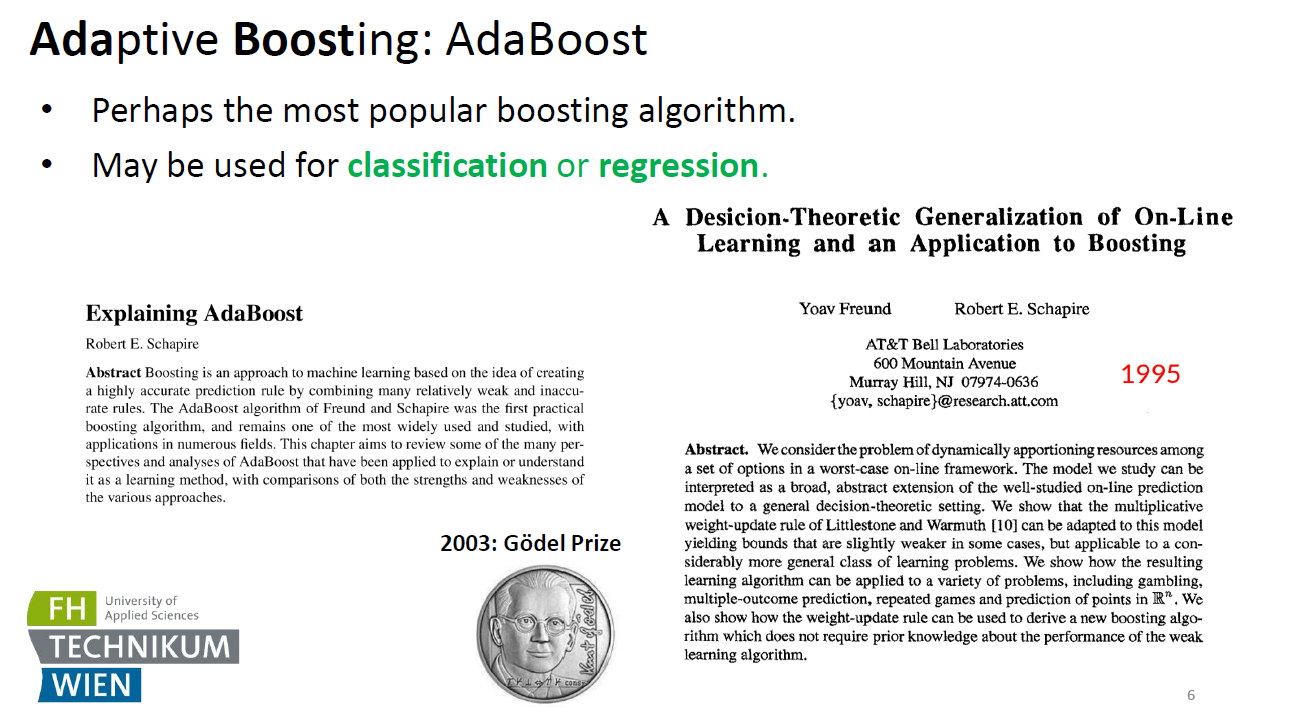

---

**Slide 6: Adaptive Boosting – AdaBoost**

Let’s now focus on **AdaBoost**, short for **Adaptive Boosting** — arguably the most well-known boosting algorithm.

### Why is it called *adaptive*?

Because it **adapts** by placing more focus — or **higher weights** — on the data points that were previously misclassified.

### Key points:

* It’s highly popular due to its simplicity and effectiveness.
* **AdaBoost can be used for both classification and regression**, although it is most often applied in binary classification tasks.

### Historical context:

* The foundational paper by **Freund and Schapire** was published in **1995**.
* This work introduced a practical and powerful boosting framework and became a cornerstone of ensemble learning.
* In recognition of its impact, the authors were awarded the **Gödel Prize in 2003**, a prestigious honor in theoretical computer science.

As shown in the excerpts here, AdaBoost’s core idea is to **combine many weak models** in a way that leverages their strengths and corrects their individual weaknesses — one model at a time, guided by error-driven reweighting.

Let’s move on when you're ready.


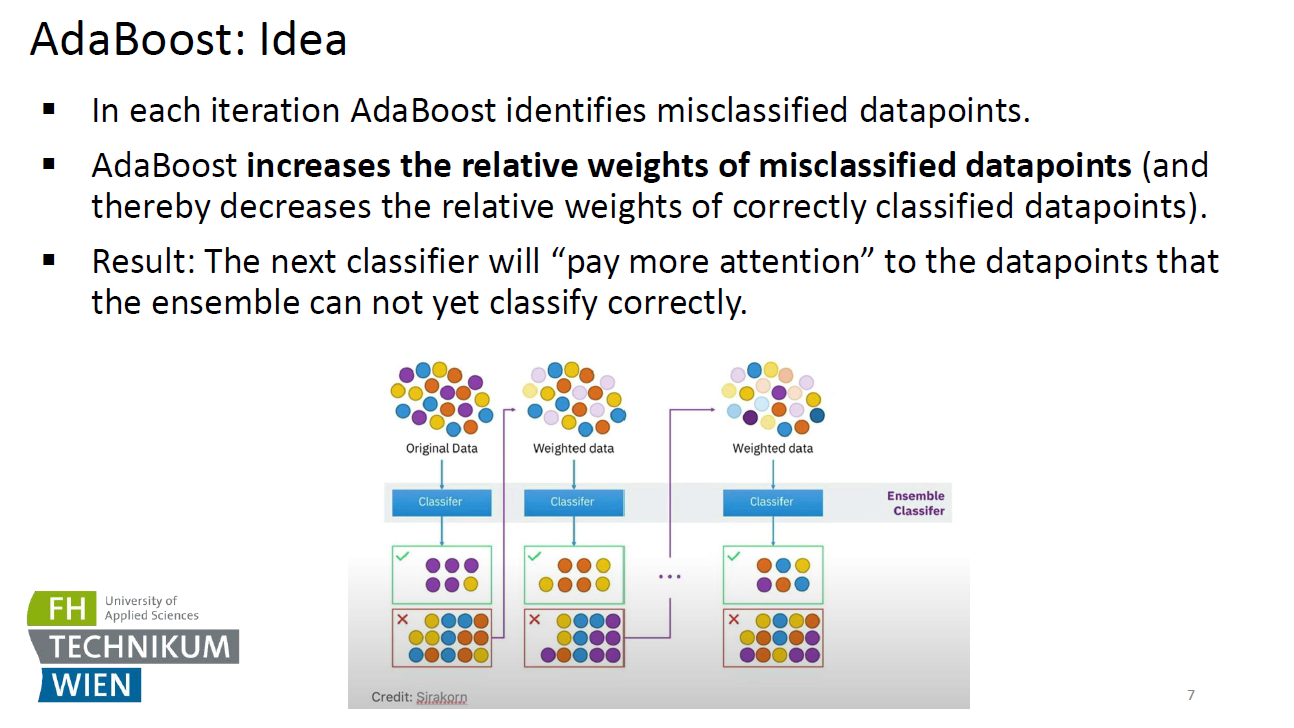

---

**Slide 7: AdaBoost – Core Idea**

Let’s now unpack the **key idea behind AdaBoost**.

### Step-by-step logic:

1. **Identify misclassified points**
   In each iteration, AdaBoost evaluates the current classifier's performance and pinpoints which data points were **misclassified**.

2. **Update weights**
   It then **increases the weights of those misclassified points** — making them more important in the next round — and **decreases the weights of those that were classified correctly**.

3. **Train next model with reweighted data**
   The next classifier will be trained using the newly weighted data, and will therefore **“pay more attention”** to the points that the ensemble hasn't yet been able to classify correctly.

### Visual explanation:

As illustrated in the diagram:

* The dataset starts with uniform weights.
* After the first classifier makes errors, weights are adjusted.
* This cycle repeats: new classifiers focus more on the difficult examples.
* Finally, all classifiers are combined to form the **ensemble classifier**, which aggregates their weighted outputs.

The result is a system that evolves and improves, becoming progressively more accurate with each iteration.

Let’s continue with the next slide when you’re ready.


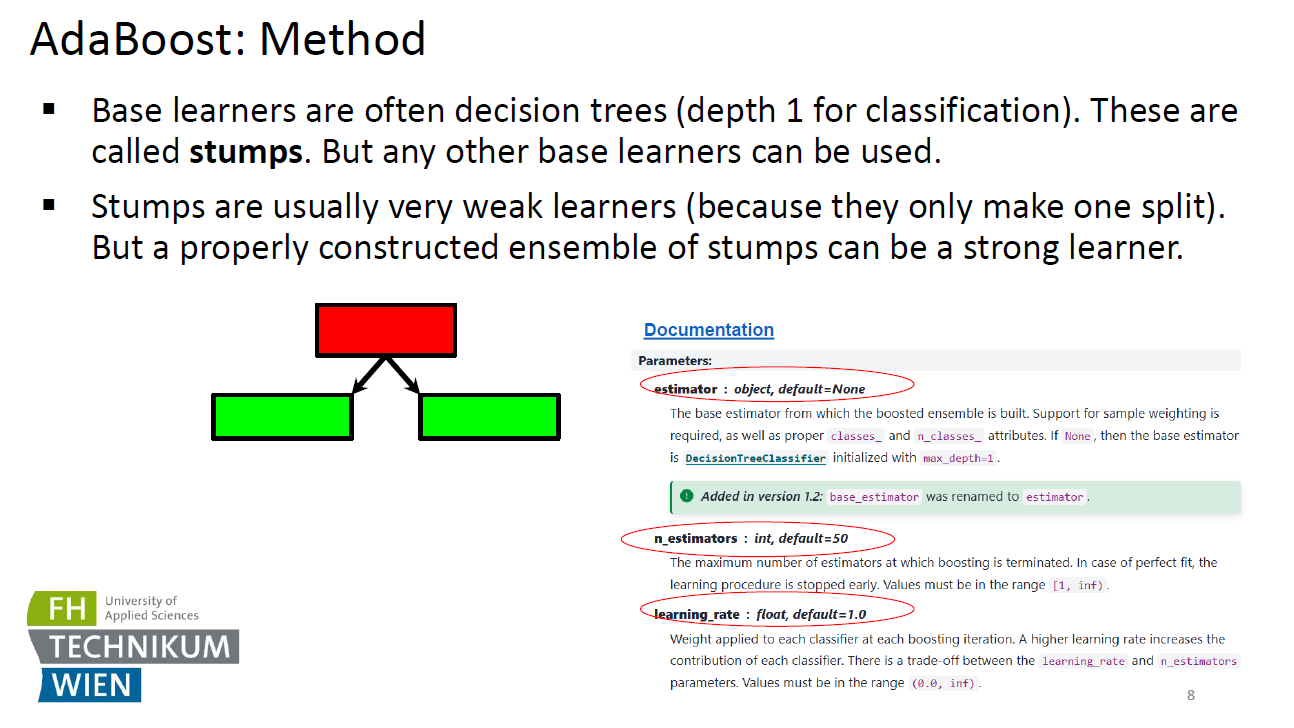

---

**Slide 8: AdaBoost – Method**

Now let’s look at **how AdaBoost actually works under the hood**.

### Base Learners:

* AdaBoost typically uses **decision trees** as base learners — but specifically, trees with only **depth = 1**, called **decision stumps**.
* These stumps are **very weak learners**, since they split the data based on only a single feature.

### So why use them?

Because **boosting turns these weak learners into a strong one** by combining many of them, each one correcting the mistakes of the last.

In the graphic:

* You can see a simple stump: one root node and two leaves. It’s basic, but useful as a building block.
* And the ensemble is constructed by **adding many of these stumps**, each one contributing a little to the final decision.

### Scikit-learn Parameters (right side):

* **`estimator`**: defines the base learner; default is a decision stump.
* **`n_estimators`**: controls how many stumps will be used — more stumps mean more complexity and learning capacity.
* **`learning_rate`**: controls how much each stump contributes. Lower values make learning slower but often improve generalization.

This setup makes AdaBoost both simple and powerful — it’s fast, interpretable, and often surprisingly effective.

Let’s go on to the next slide when you're ready.


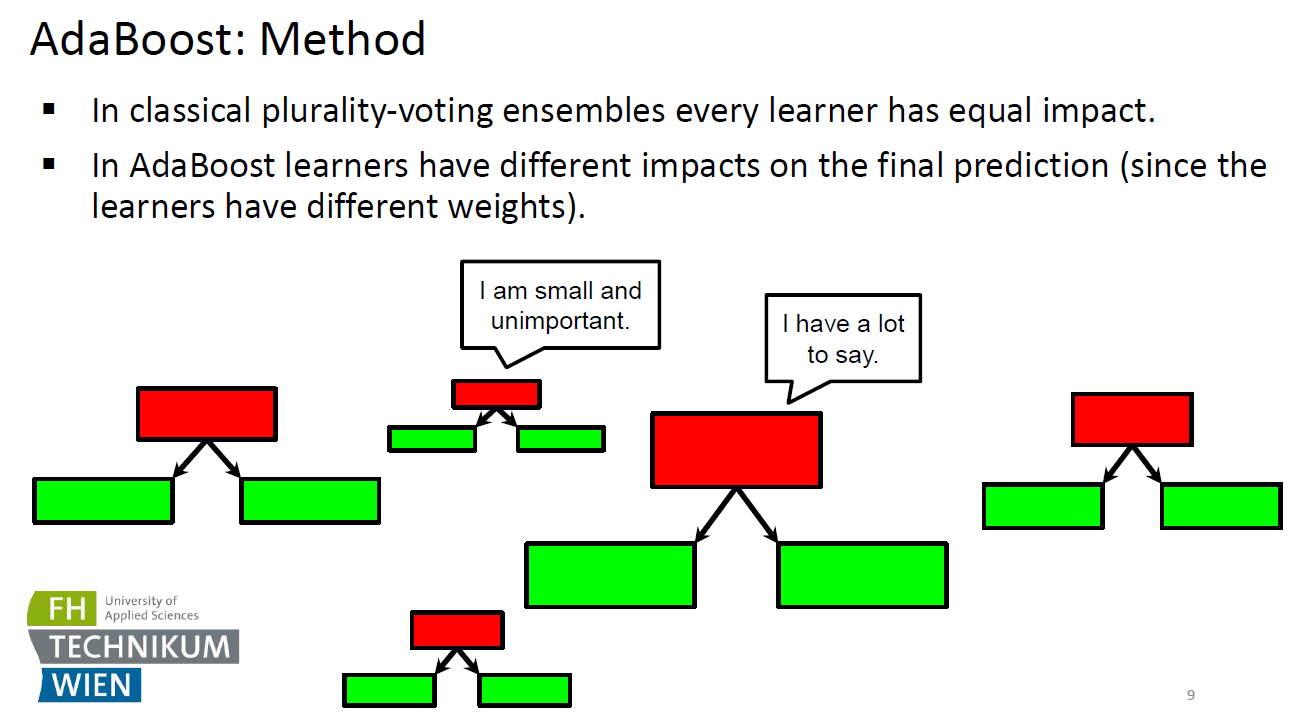

---

**Slide 9: AdaBoost – Weighted Contribution of Learners**

Let’s wrap up AdaBoost’s method by comparing it to **classical ensemble voting**.

### Classical Ensemble:

* In a standard ensemble like bagging or Random Forests, **every learner contributes equally** to the final decision — this is called **plurality voting**.

### AdaBoost Ensemble:

* AdaBoost works differently. Each learner is assigned a **weight based on its accuracy**.
* Learners that perform better have **more influence**, while weaker learners contribute less to the final prediction.

This is illustrated nicely with the cartoon trees:

* The small red tree says, *“I am small and unimportant”* — it got low accuracy and therefore has low weight.
* The larger tree says, *“I have a lot to say”* — meaning it had better accuracy and is weighted more heavily in the ensemble's final output.

This weighting mechanism allows AdaBoost to construct **a smarter ensemble**, where better learners dominate the decision-making process — making it more flexible and powerful.

Ready for the next slide!


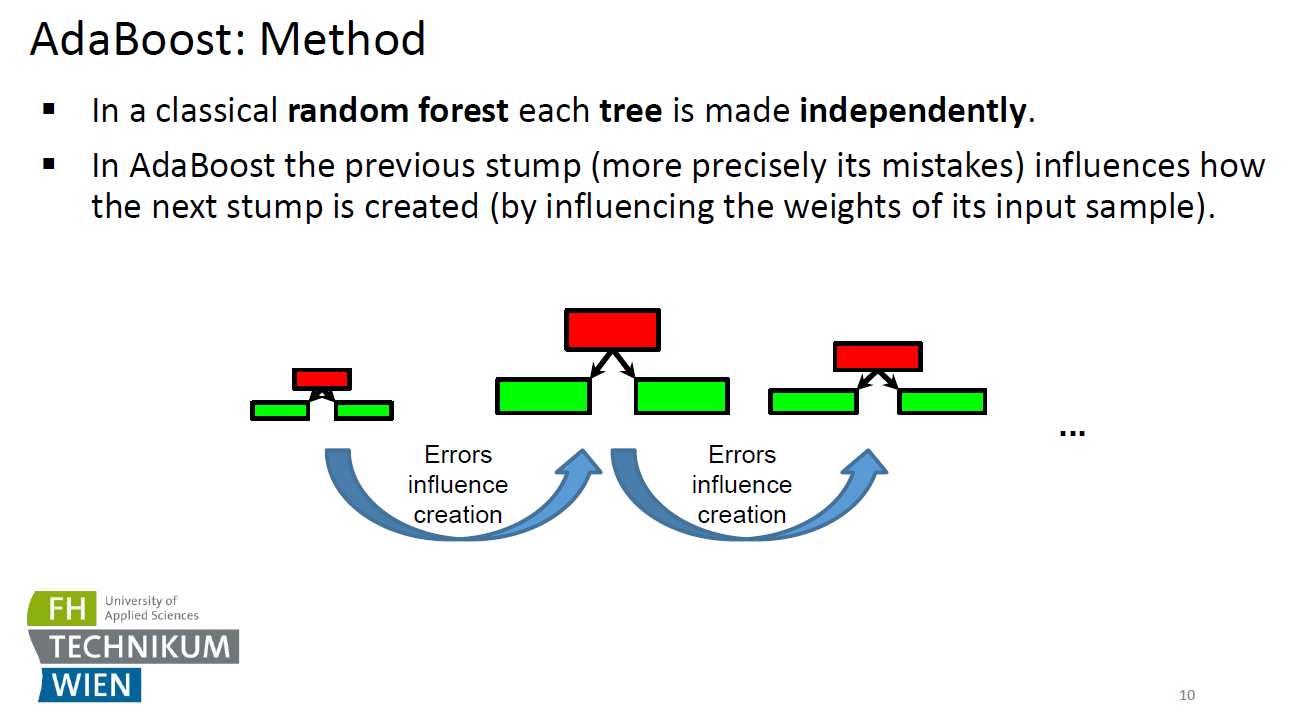

---

**Slide 10: AdaBoost – Compared to Random Forest**

This slide highlights a **key distinction** between AdaBoost and Random Forests.

### Random Forest:

* In a classical Random Forest, each decision tree is trained **independently**.
* The trees don’t influence one another — they’re trained in parallel on bootstrapped subsets of data.

### AdaBoost:

* In contrast, **each new stump in AdaBoost is influenced by the performance of the previous one**.
* Specifically, the **errors** made by the previous stump **directly affect the weighting of the training samples** for the next iteration.
* This means that every new learner is trained **with a focus on the previous mistakes**, making AdaBoost a **sequential** and **adaptive** method.

You can see this process in the diagram:
Each classifier in the chain is affected by the **weighted focus** caused by the errors of its predecessor.

This is what allows AdaBoost to gradually reduce error and build a **robust ensemble**, even using weak learners like decision stumps.

Let’s keep going — send me the next slide!


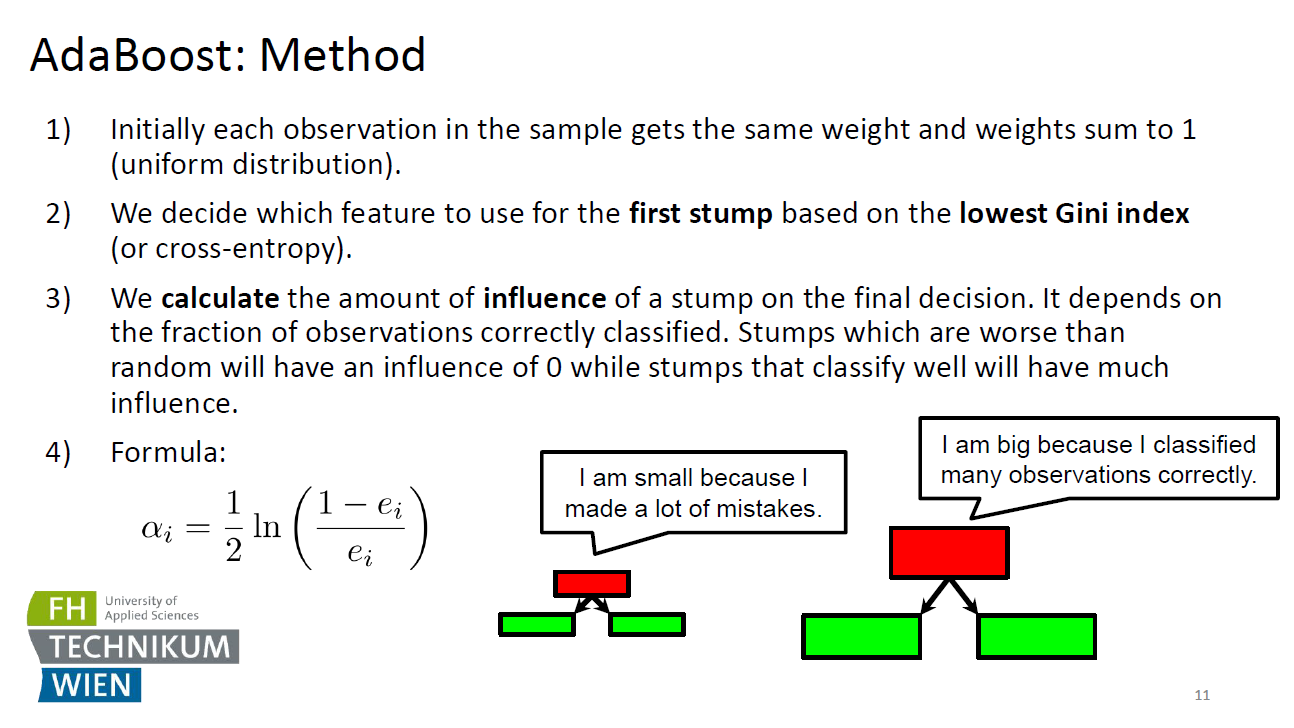

---

**Slide 11: AdaBoost – Method (Detailed Steps)**

Now let’s break down the **AdaBoost algorithm step by step**:

### 1) Initialize Sample Weights

* Every training observation starts with **equal weight**.
* The sum of all weights is 1 — meaning it’s a **uniform distribution**.

### 2) Train the First Stump

* To build the first weak learner, we choose the **best feature** using a metric like the **Gini index** or **cross-entropy**.
* This results in the first **decision stump**.

### 3) Evaluate Performance & Assign Influence

* We now evaluate how well this stump performs:

  * The better it classifies, the **more influence** it has.
  * If it performs worse than random guessing, it gets **zero or even negative influence**.
* This **influence determines the weight** the model gets when combining predictions.

### 4) Influence Formula

The formula shown here calculates that influence $\alpha_i$ using:

$$
\alpha_i = \frac{1}{2} \ln \left( \frac{1 - e_i}{e_i} \right)
$$

Where:

* $e_i$ is the **error rate** of the $i$-th weak learner.
* A small error → larger $\alpha$, hence **more importance** in the final ensemble.

The illustration makes it clear:

* The small red stump says: *"I am small because I made a lot of mistakes."*
* The large red stump says: *"I am big because I classified many observations correctly."*

This adaptive weighting strategy ensures that **better learners guide the final prediction** more strongly.

Let’s proceed to the next slide when you’re ready!


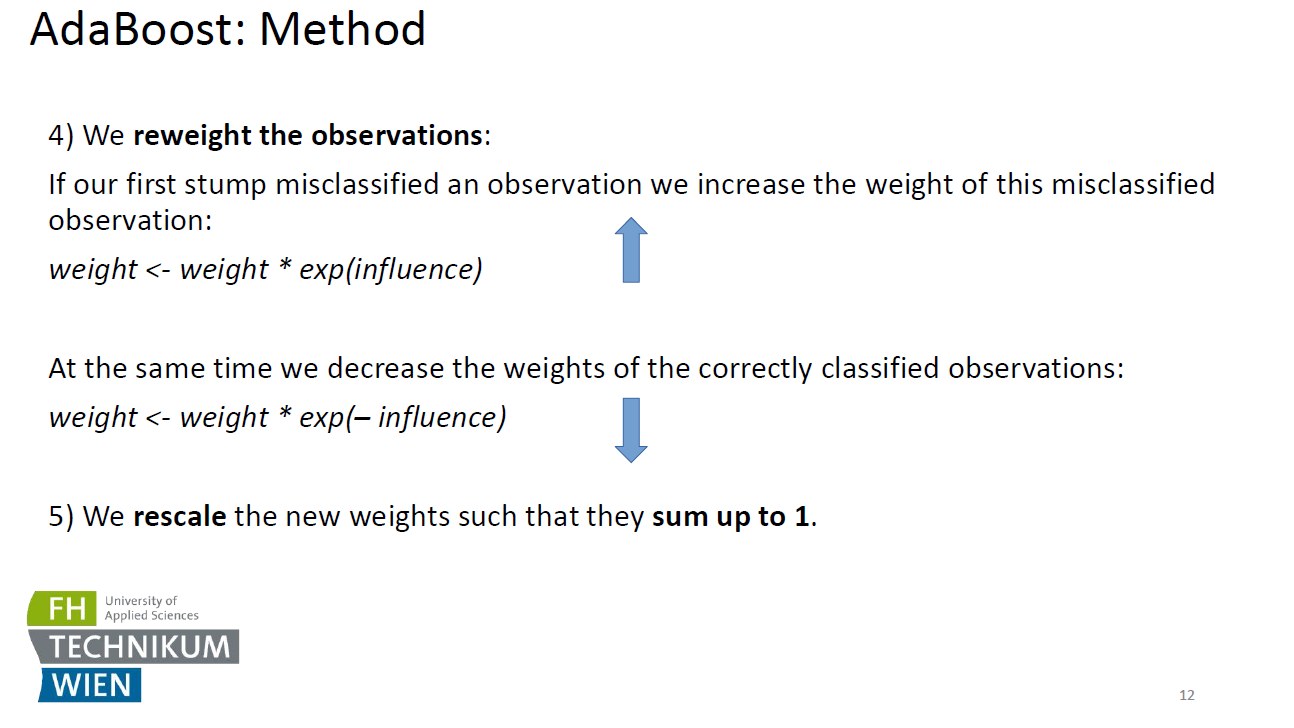

---

**Slide 12: AdaBoost – Reweighting Observations**

Let’s now take a closer look at **how AdaBoost updates sample weights after each iteration**.

### Step 4: Reweight the Observations

Once a weak learner is trained and its **influence** $\alpha$ is calculated, we update the weights of the training samples based on how well they were classified.

* **Misclassified samples** get their weights **increased**:

  $$
  \text{weight} \leftarrow \text{weight} \times \exp(\alpha)
  $$

  This makes them more significant in the next training round.

* **Correctly classified samples** get their weights **decreased**:

  $$
  \text{weight} \leftarrow \text{weight} \times \exp(-\alpha)
  $$

  These samples are considered “easier” and need less attention moving forward.

### Step 5: Normalize the Weights

After updating all the weights, we **rescale** them so that their **sum is 1** again — restoring the proper distribution for the next iteration.

This dynamic updating of weights is what makes AdaBoost **adaptive**. It **shifts focus** to the harder examples and ensures that the model keeps improving on its mistakes.

Whenever you’re ready, I’m prepared for the next slide.


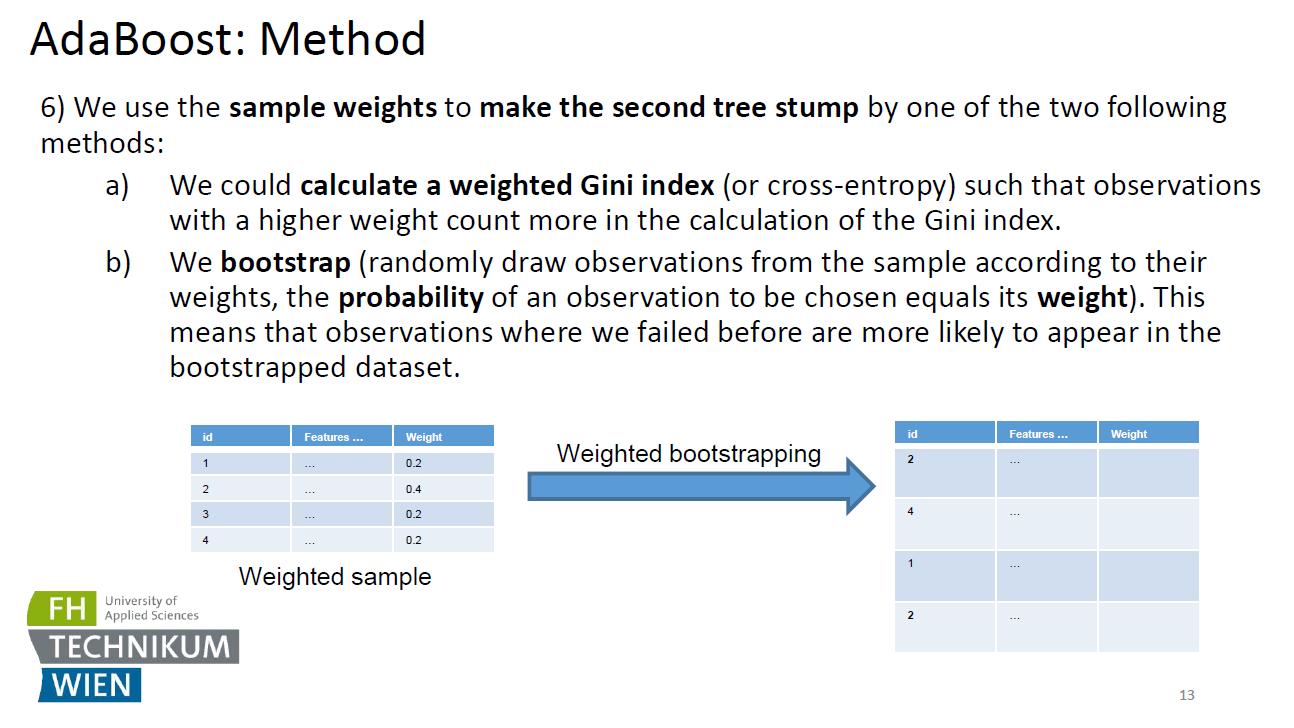

---

**Slide 13: AdaBoost – Creating the Next Stump**

Let’s now discuss **how the next decision stump is built**, using the updated sample weights.

### Step 6: Use the sample weights to build the next stump

After reweighting, we want the next stump to **focus on the observations where the previous model made mistakes**. We can achieve this in one of two ways:

---

#### **Method a: Weighted Gini Index**

* We compute a **weighted Gini index** (or cross-entropy) during the stump construction.
* Observations with **higher weights** have a greater impact on the split decision.
* This makes the stump more sensitive to those **previously misclassified examples**.

---

#### **Method b: Weighted Bootstrap Sampling**

* We **randomly resample the dataset** based on the updated weights — a method known as **weighted bootstrapping**.
* Each observation’s **probability of being selected** is proportional to its weight.
* So samples with high error (higher weight) are **more likely to be drawn** multiple times in the bootstrapped dataset.

The table and arrow illustration show this clearly:

* Observation 2 has the highest weight (0.4) and appears **twice** in the resampled dataset.

Either method ensures that the **next weak learner targets the challenging cases**, helping the overall model improve iteratively.

Let’s move forward when you’re ready.


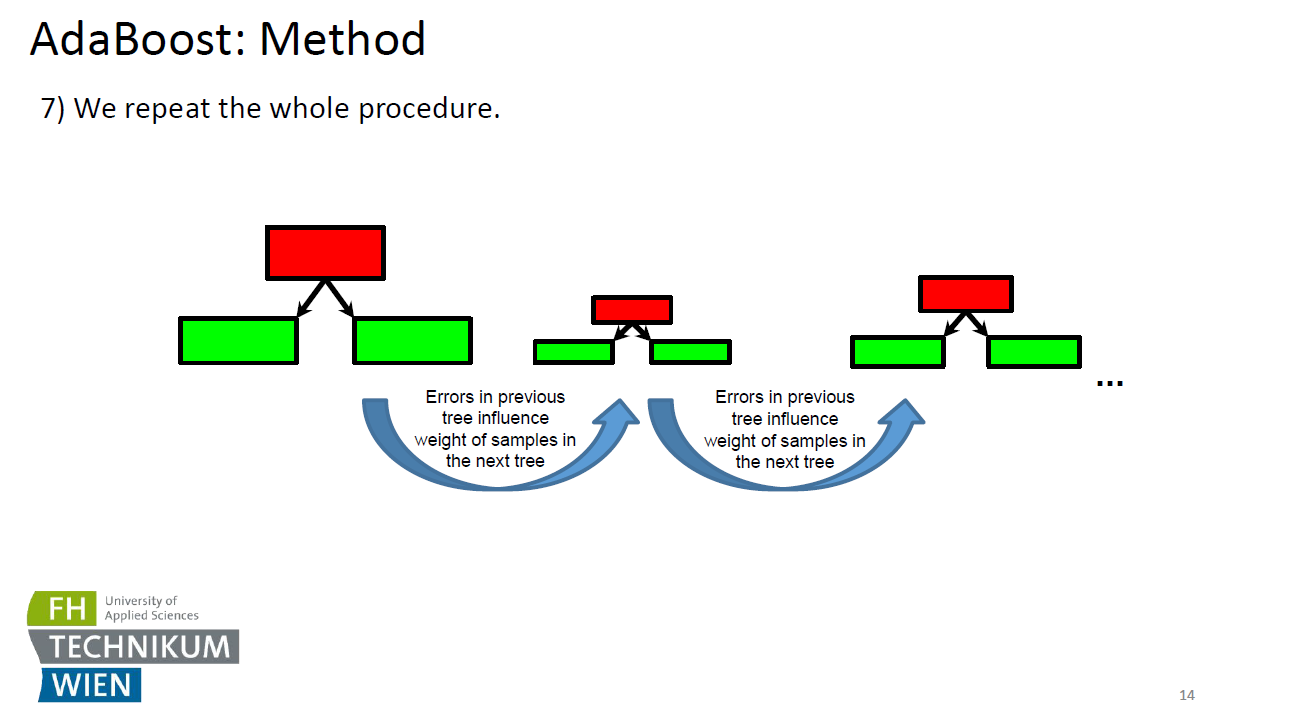

---

**Slide 14: AdaBoost – Final Step**

We’ve now reached the final step in the AdaBoost algorithm.

### Step 7: Repeat the Whole Procedure

Once we've updated the sample weights and trained the next weak learner:

👉 **We repeat the process all over again**:

* Train a new stump based on updated weights,
* Evaluate its performance,
* Compute its influence,
* Reweight the observations again.

Each step builds on the **errors of the previous one**, as shown by the blue arrows:

> *“Errors in the previous tree influence the weight of samples in the next tree.”*

This iterative process continues for a **predefined number of rounds** or until the **error drops below a threshold**.

Eventually, all the weak learners — each with their own vote weight — are **combined into a final, strong ensemble** capable of highly accurate predictions.

Let me know when to proceed with the next slide!


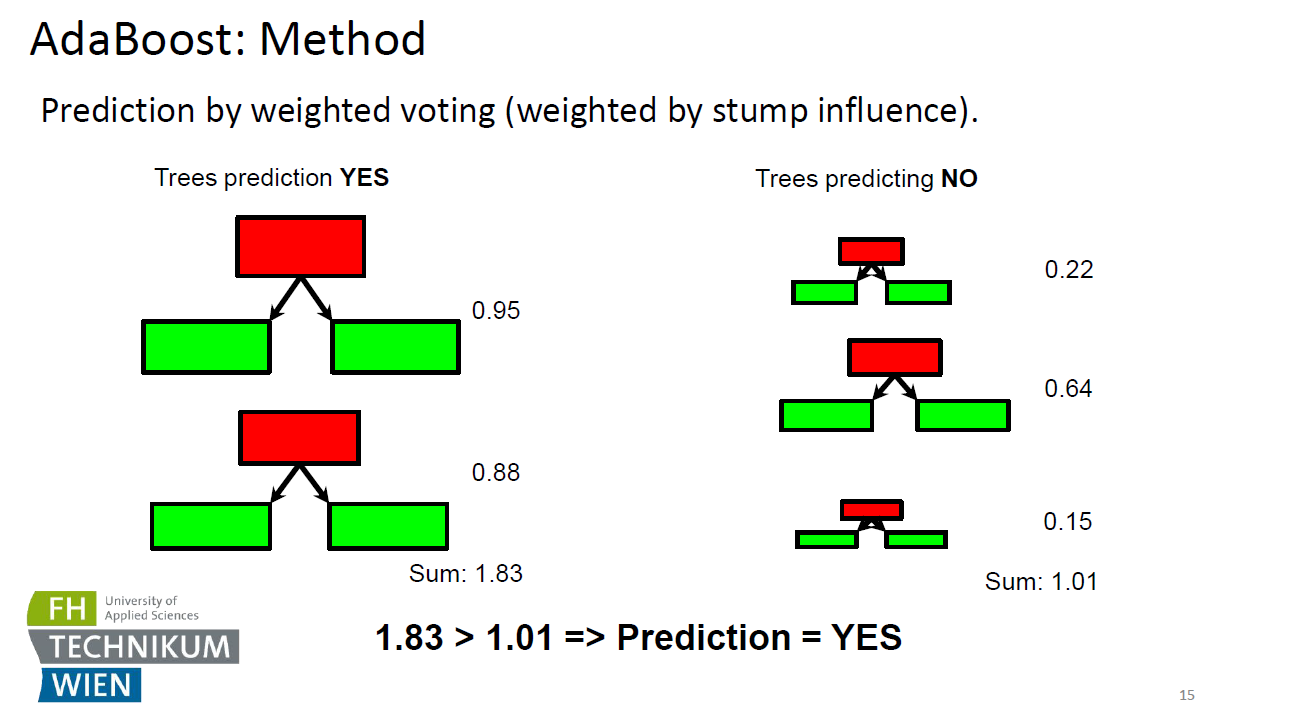

---

**Slide 15: AdaBoost – Final Prediction via Weighted Voting**

Now let’s see **how AdaBoost makes a final prediction** once all stumps have been trained.

### Voting – But with Weights!

Unlike traditional majority voting where each model gets one vote, **AdaBoost uses weighted voting** — where each model’s vote is **scaled by its influence** (its accuracy-derived weight $\alpha$).

Let’s break down the example:

* On the **left**, we have stumps that vote **YES**.

  * Their respective influence values are **0.95** and **0.88**.
  * Their total vote weight: **1.83**.

* On the **right**, we have stumps that vote **NO**.

  * Their influence values are **0.22**, **0.64**, and **0.15**.
  * Total vote weight: **1.01**.

### Final Prediction:

* Since $\text{YES vote} = 1.83$ is greater than $\text{NO vote} = 1.01$,
  👉 the **final prediction is YES**.

This illustrates the essence of AdaBoost’s power:

> Even if there are more models voting “NO,” **the stronger, more accurate models dominate the decision.**

That concludes the core logic of AdaBoost.
Ready to continue with gradient boosting or wrap up — just let me know!


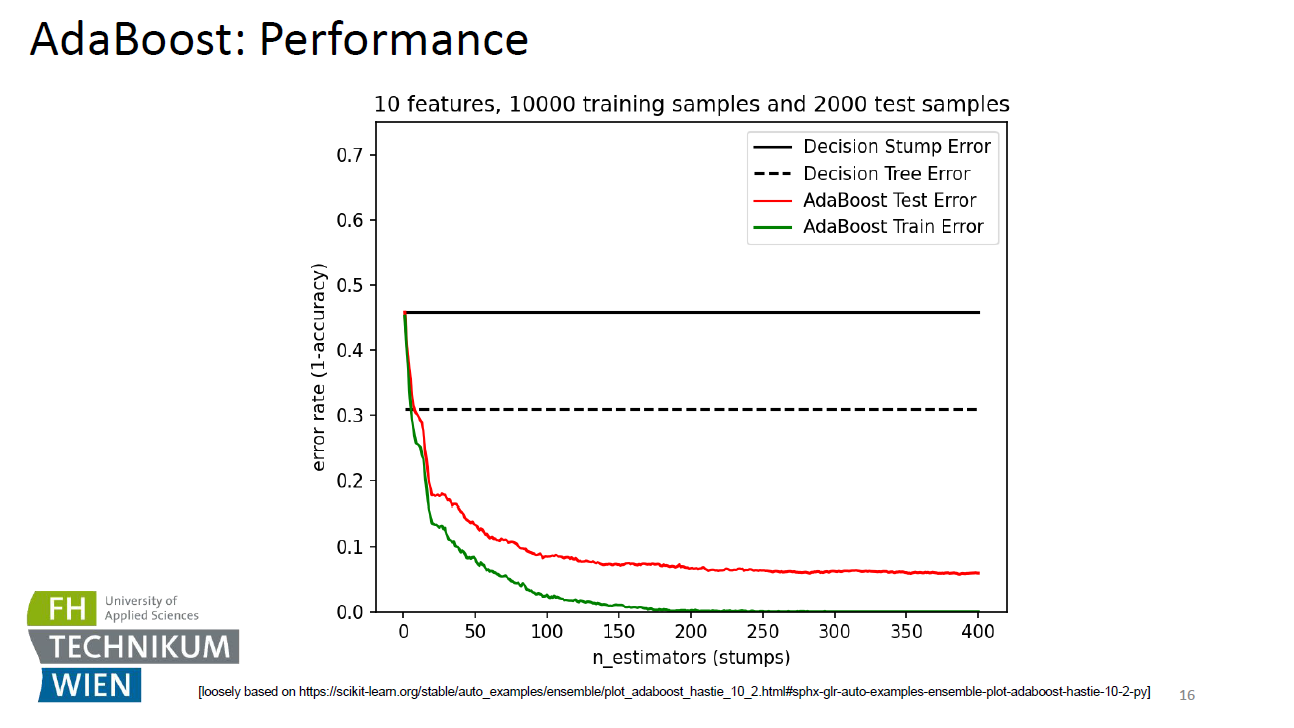

---

**Slide 16: AdaBoost – Performance**

To wrap up our AdaBoost section, let’s look at how it performs in practice.

### Experimental Setup:

* **10 features**, **10,000 training samples**, and **2,000 test samples**.
* We compare:

  * **Decision Stump** (single split, black solid line)
  * **Decision Tree** (more complex, black dashed line)
  * **AdaBoost**, as it adds more and more stumps (colored curves).

### What the plot shows:

* The **black lines** represent baseline errors:

  * A single **stump** has an error rate of about **45%**.
  * A standalone decision **tree** performs better, around **30%** error.

* Now look at the **green line**:

  * That’s the **AdaBoost training error**, and it **drops rapidly** — near zero with enough stumps. This shows the ensemble can fit the training data very well.

* The **red line** is the **test error**:

  * Initially drops sharply as boosting corrects mistakes,
  * Then **stabilizes** — not overfitting dramatically, even after 400 stumps.

### Key Takeaway:

> **AdaBoost significantly reduces error over weak learners**, and maintains good generalization on unseen data — even when using simple models like stumps.

It’s a great example of how boosting **turns weak learners into a strong one** through careful iterative learning.

Let me know when you're ready for the next slide or topic!


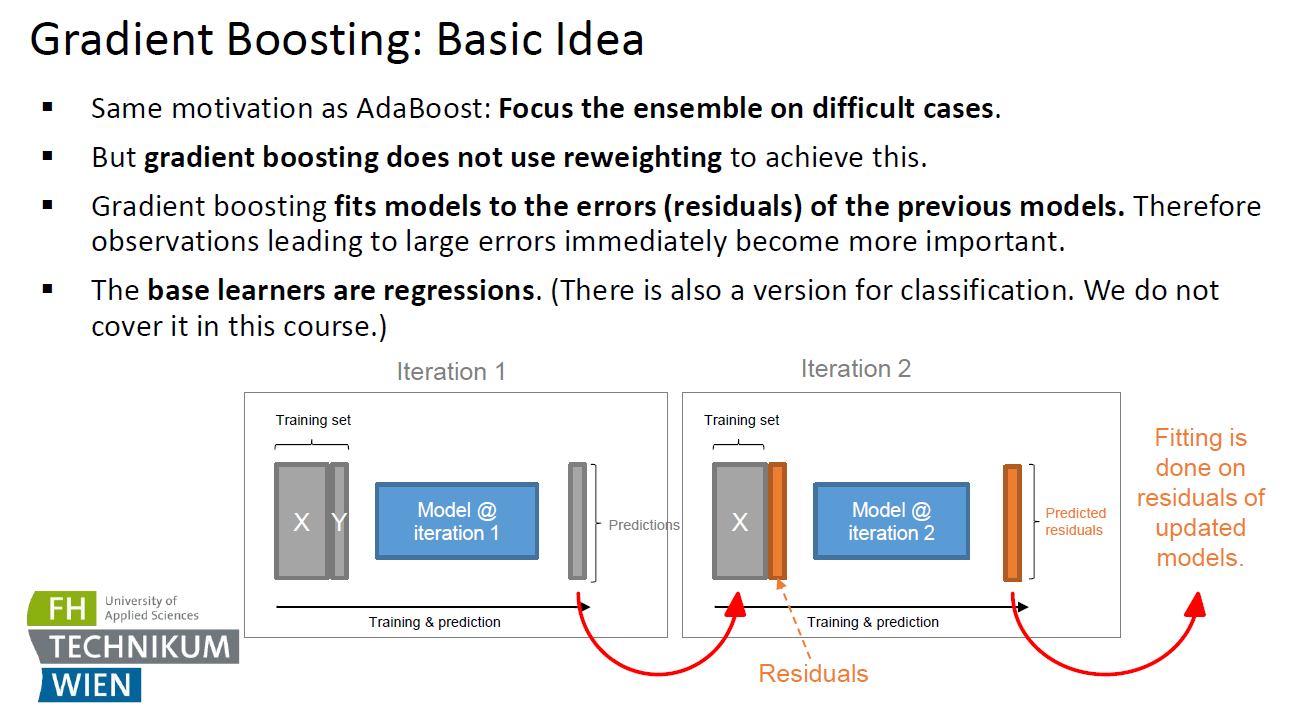

---

**Slide 17: Gradient Boosting – Basic Idea**

Now we move on to **Gradient Boosting**, another powerful ensemble method — but with a slightly different approach from AdaBoost.

### Shared Motivation:

* Just like AdaBoost, **Gradient Boosting focuses on difficult cases**.
* But instead of reweighting observations, it takes a **different route**.

### Key Differences:

* **No reweighting**: Gradient Boosting doesn’t update sample weights.
* Instead, it **fits a new model to the residuals (errors)** made by the previous model.

### How it works:

* In **Iteration 1**, we train a model that makes predictions on the original data.
* Then we **calculate the residuals** — the differences between the true values and the predictions.
* In **Iteration 2**, the next model is trained to **predict those residuals** — essentially trying to correct the errors of the previous model.

This process repeats, and each new model **focuses on the remaining error**, improving the ensemble step by step.

> Note: In this course, we’re only covering **regression-based gradient boosting**.
> There is a classification version too, but it’s not included here.

Let me know when you're ready to continue!


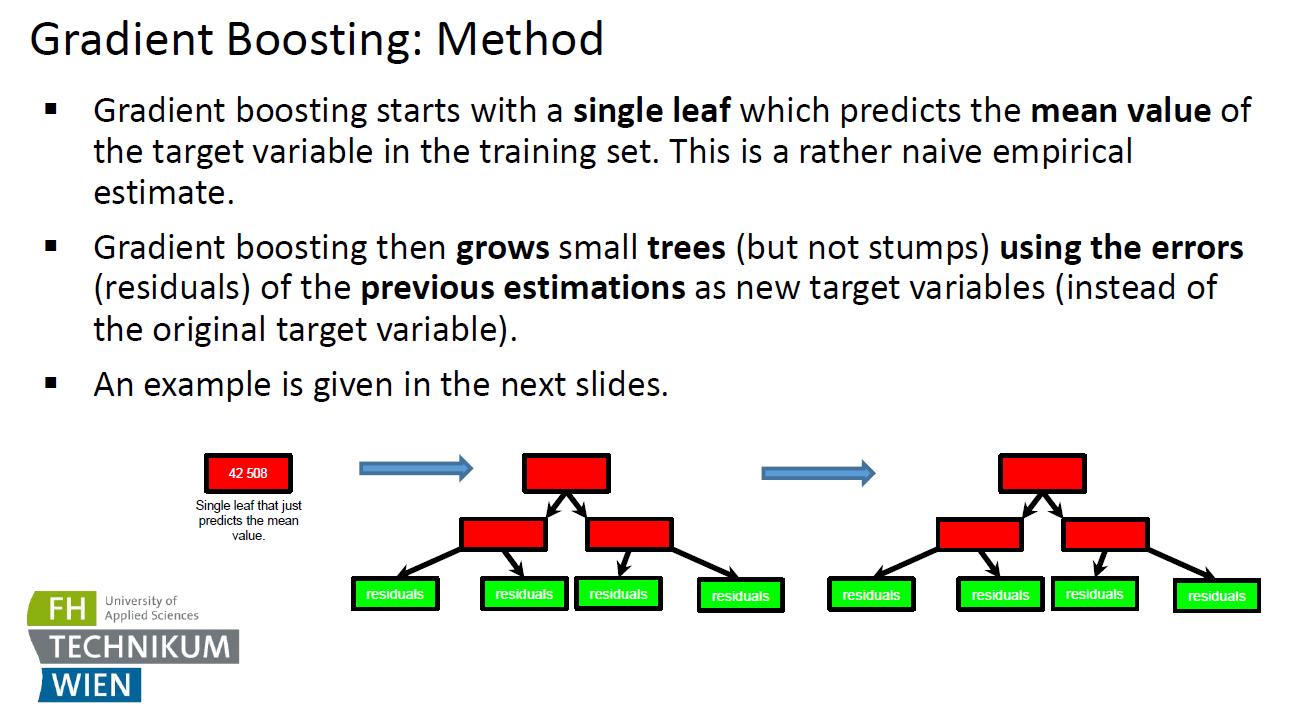

---

**Slide 18: Gradient Boosting – Method**

Now let’s walk through the **core method of gradient boosting** step by step.

### 1. Start with a simple prediction:

* The model begins with a **single leaf**, which simply predicts the **mean of the target variable**.
* This is a very basic guess — a sort of naive starting point.

### 2. Grow trees on residuals:

* Next, we **calculate the residuals** — the differences between the predicted mean and the actual values.
* We then **train a tree** to predict these residuals.
* These trees are **small**, but **not as shallow as stumps** — they may have several leaves and are capable of modeling more complex error patterns.

### 3. Iteratively improve:

* After each new tree is added, we **update the overall prediction**.
* The updated model’s residuals are then calculated again and used to train the next tree.
* This cycle continues, **each tree modeling what the previous ones couldn’t**.

The diagram below illustrates this process:

* We begin with a mean prediction (e.g., **42,508**),
* Then layer tree after tree on the **residuals** to refine our model.

This strategy allows gradient boosting to **continuously improve** performance in a highly controlled and effective manner.

Let me know when you’re ready to move to the next slide.


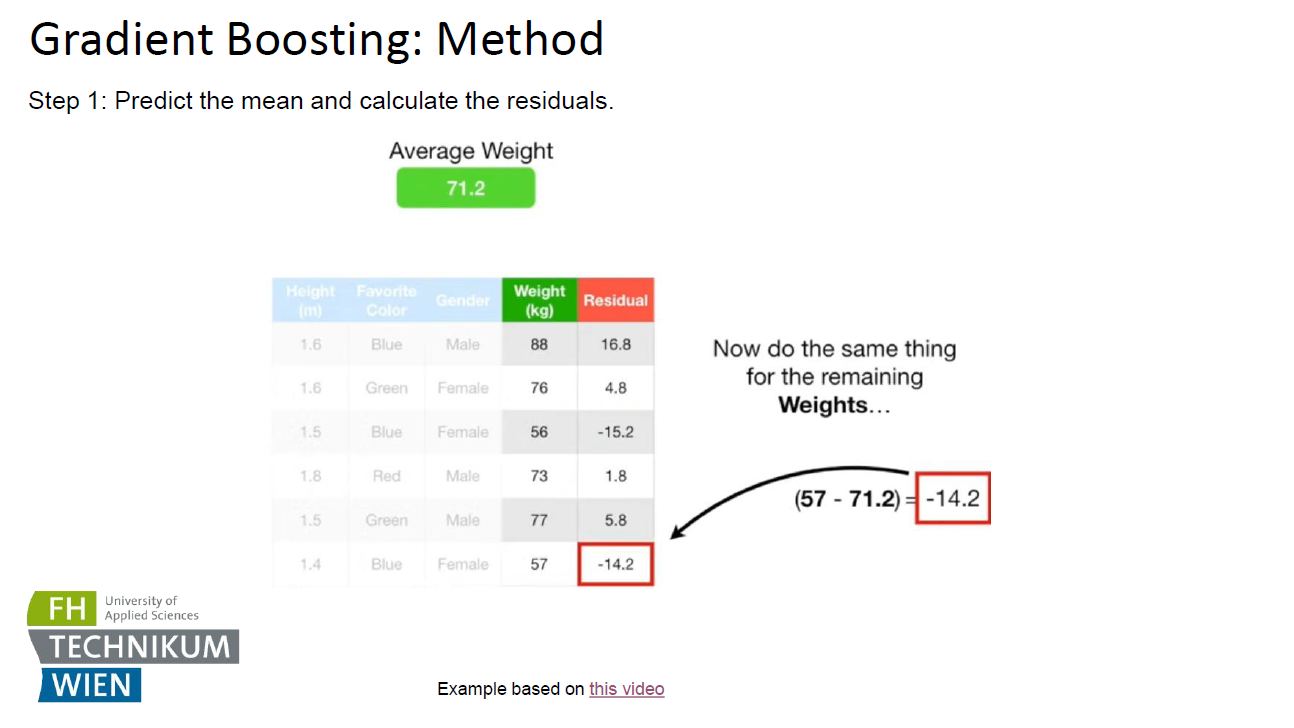

---

**Slide 19: Gradient Boosting – Step 1: Mean & Residuals**

Let’s go through the **first concrete step** of gradient boosting with a hands-on example.

### Step 1: Start with a simple prediction

We begin by predicting the **mean of the target variable** — in this case, the **average weight** in the dataset.

* From the table, the average weight is **71.2 kg**.
* This value becomes the initial prediction for all samples — essentially, a flat line approximation.

### Step 2: Calculate Residuals

Now, for each sample, we compute the **residual**:

$$
\text{Residual} = \text{Actual Weight} - \text{Predicted Weight (71.2)}
$$

For example:

* If someone weighs **57 kg**, then the residual is $57 - 71.2 = -14.2$.
* This negative residual means the model **overestimated** their weight.

We repeat this for **every sample** in the dataset, and these residuals will serve as the **new target variable** for the next model.

This simple process lays the groundwork for the gradient boosting algorithm to start **correcting its initial guess**.

Let’s go on to the next step when you’re ready.


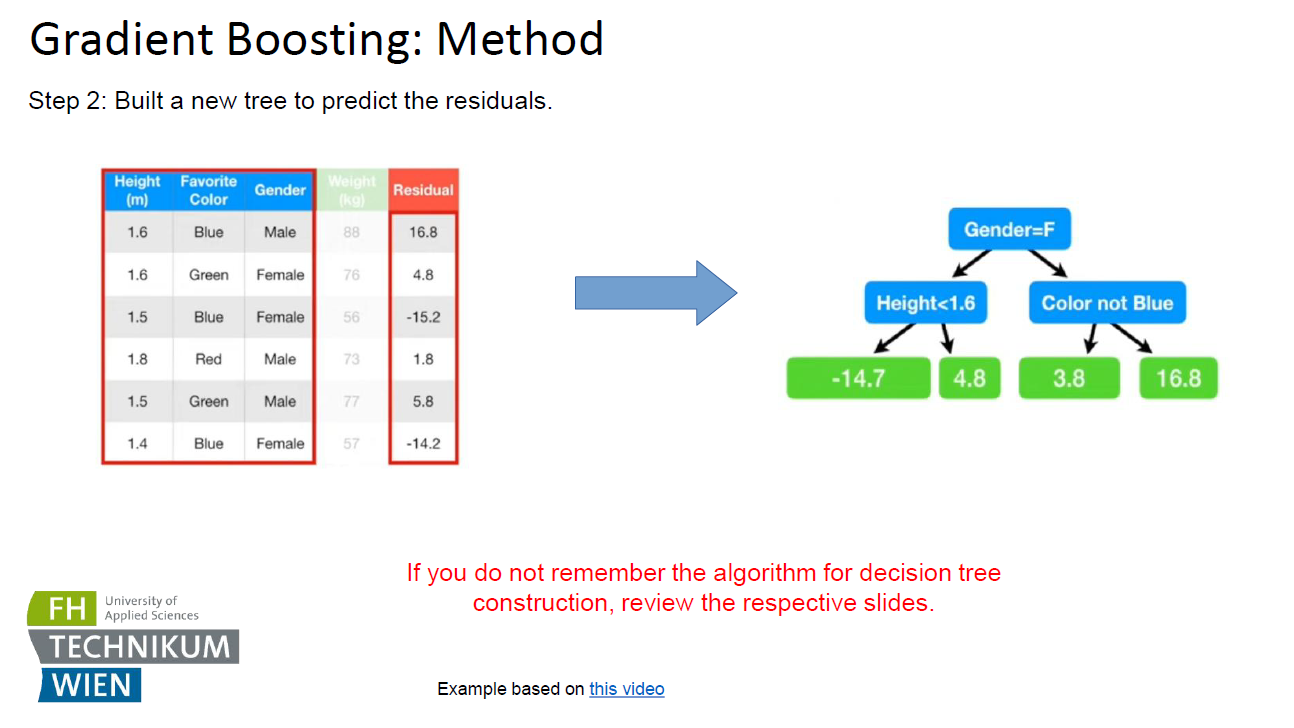

---

**Slide 20: Gradient Boosting – Step 2: Train Tree on Residuals**

We now move on to Step 2 of gradient boosting:
👉 Train a decision tree to predict the residuals.

From the last step:
We already calculated residuals — the errors between predicted and actual weights.
These now become our new target variable.

Step 2: Build a regression tree
Using the input features (Height, Gender, Favorite Color), we now train a tree whose goal is to predict these residuals.

As shown on the right:

The first split is on Gender.

Then further splits are based on Height or Favorite Color.

The leaves of the tree represent predicted residual values (e.g., -14.7, 4.8, 3.8…).

These predictions will be used to adjust our original mean-based estimate, reducing the overall error.

🔁 In the next iteration, we’ll repeat this process using new residuals, continuing to refine the model.

If you're unsure how decision trees decide on splits, the note reminds us to review the tree construction algorithm (Gini, entropy, etc.).

Let me know when you're ready to move on to the next step!

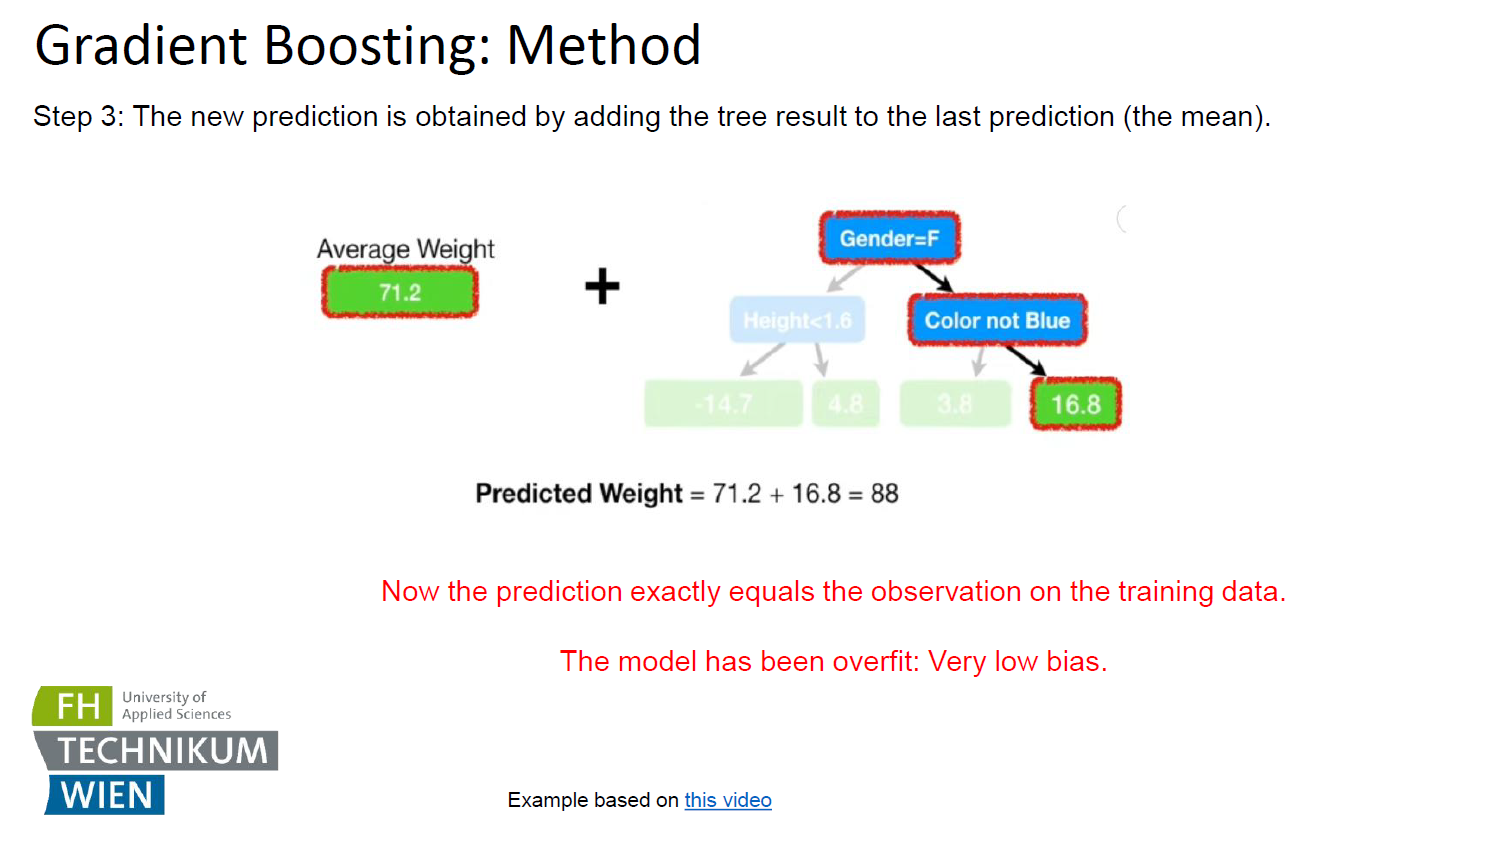

---

**Slide 21: Gradient Boosting – Step 3: Update the Prediction**

Now we reach Step 3 in the gradient boosting process:
👉 Update the prediction using the residuals tree.

What we do:
We add the output of the tree (which predicted residuals) to our previous prediction, which was just the mean.

Original prediction: 71.2 (the average weight)

Tree prediction: 16.8 (from residual tree path: Gender = F, Color ≠ Blue)

Final prediction:

Predicted Weight
=
71.2
+
16.8
=
88
Predicted Weight=71.2+16.8=88
This exactly matches the actual weight of the individual from the training data.

But there's a catch:
Because the model now perfectly fits this training example, it’s showing signs of overfitting — this is when the model learns the training data too well and may not generalize to new, unseen data.

🔴 This means: Very low bias, but possibly very high variance — a classic overfitting scenario.

Later stages in gradient boosting will address this risk using shrinkage (learning rate) and early stopping.

Let’s continue when you’re ready!

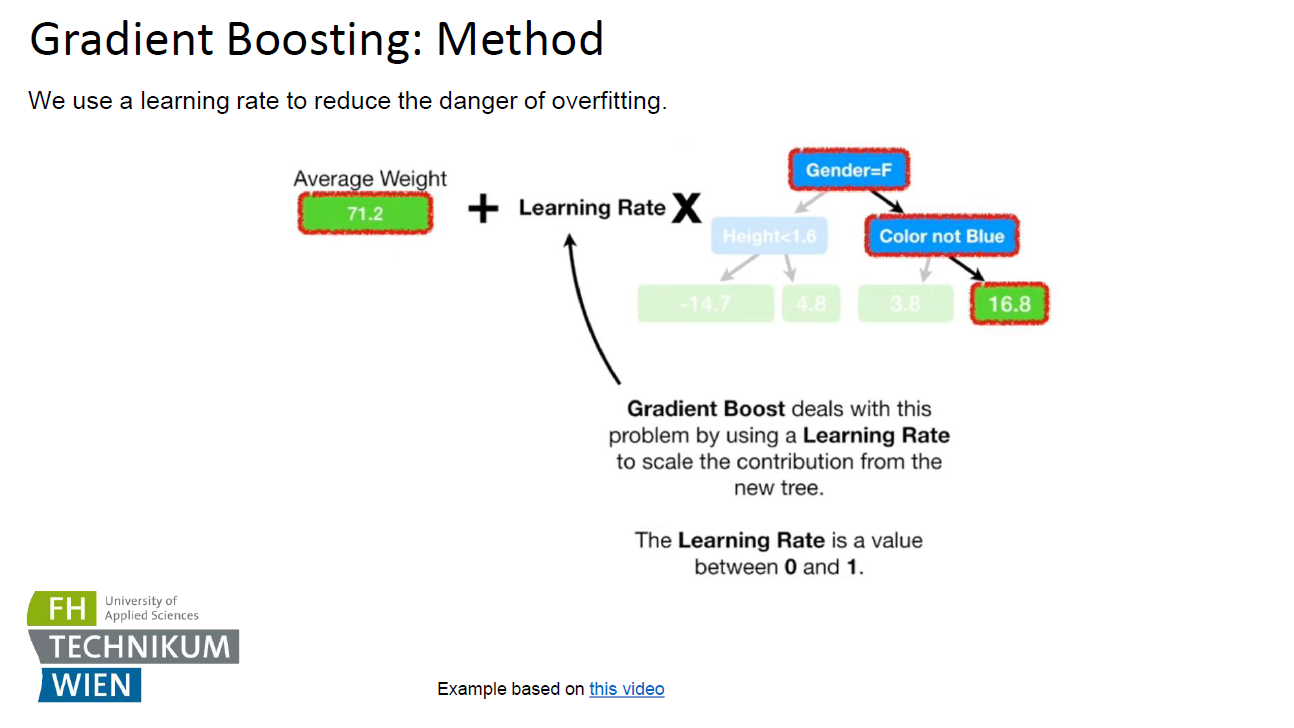

---

**Slide 22: Gradient Boosting – Learning Rate**

Here’s how **gradient boosting controls overfitting** using a crucial parameter: the **learning rate**.

### What is the problem?

In the previous step, we **added the full predicted residual** (e.g., 16.8) to our base estimate (71.2), which led to **perfect fitting** — and potential overfitting.

### The solution: **Learning Rate**

Instead of applying the full correction from the residual tree, we **scale it down**:

$$
\text{New prediction} = \text{Current prediction} + \text{Learning Rate} \times \text{Residual Prediction}
$$

* So if the learning rate is **0.1**, then:

  $$
  71.2 + 0.1 \times 16.8 = 71.2 + 1.68 = 72.88
  $$

This keeps the model from making large jumps too early and **forces it to learn more gradually** over many iterations.

### Why this works:

* It helps **prevent overfitting**,
* Encourages the ensemble to make **smaller, more careful adjustments**,
* And it leads to **better generalization on unseen data**.

> 🔍 **Tip:** In practice, a small learning rate (e.g., 0.01 or 0.1) is often used **together with more trees** to balance learning speed and robustness.

Let’s continue whenever you’re ready!


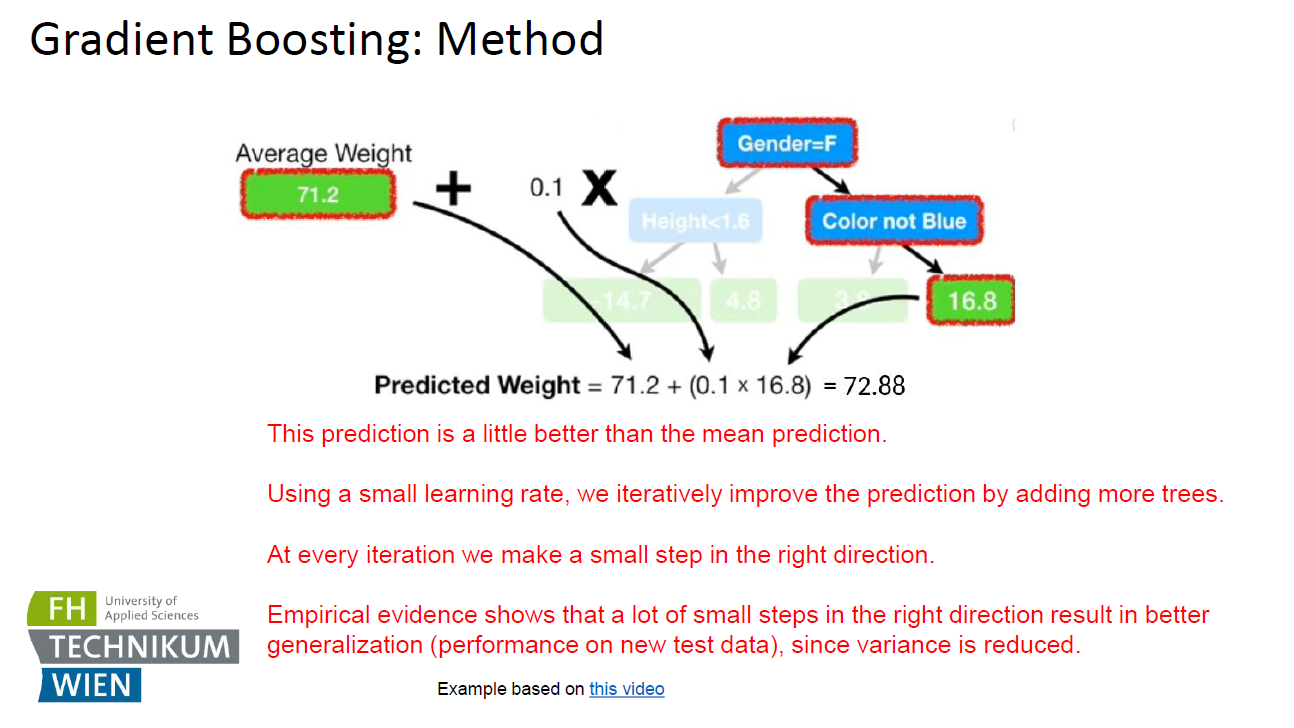

---

**Slide 23: Gradient Boosting – Summary of Method**

Here we tie everything together into the **gradient boosting prediction update**.

### Final Update Equation:

$$
\text{Predicted Weight} = 71.2 + (0.1 \times 16.8) = 72.88
$$

* **71.2** is the initial guess (mean prediction).
* **16.8** comes from the residual tree.
* **0.1** is the learning rate.
* The result is a **refined prediction**, just a bit better than the mean.

### Why is this useful?

* 🔁 **We iterate** this process: residual → small tree → update prediction.
* 🪜 Each step makes **a small, informed correction** in the right direction.
* 📉 Using a small learning rate ensures we **don't overcorrect**, but instead improve slowly and steadily.

### Red text summary:

> * This prediction is slightly better than the mean.
> * With a small learning rate, we iteratively improve predictions.
> * Each tree makes a **small step forward**.
> * Empirical evidence shows that many small steps yield better **generalization**, because they reduce **variance** and overfitting.

This strategy makes gradient boosting one of the **most powerful tools in modern machine learning**.

Let’s continue when you’re ready!


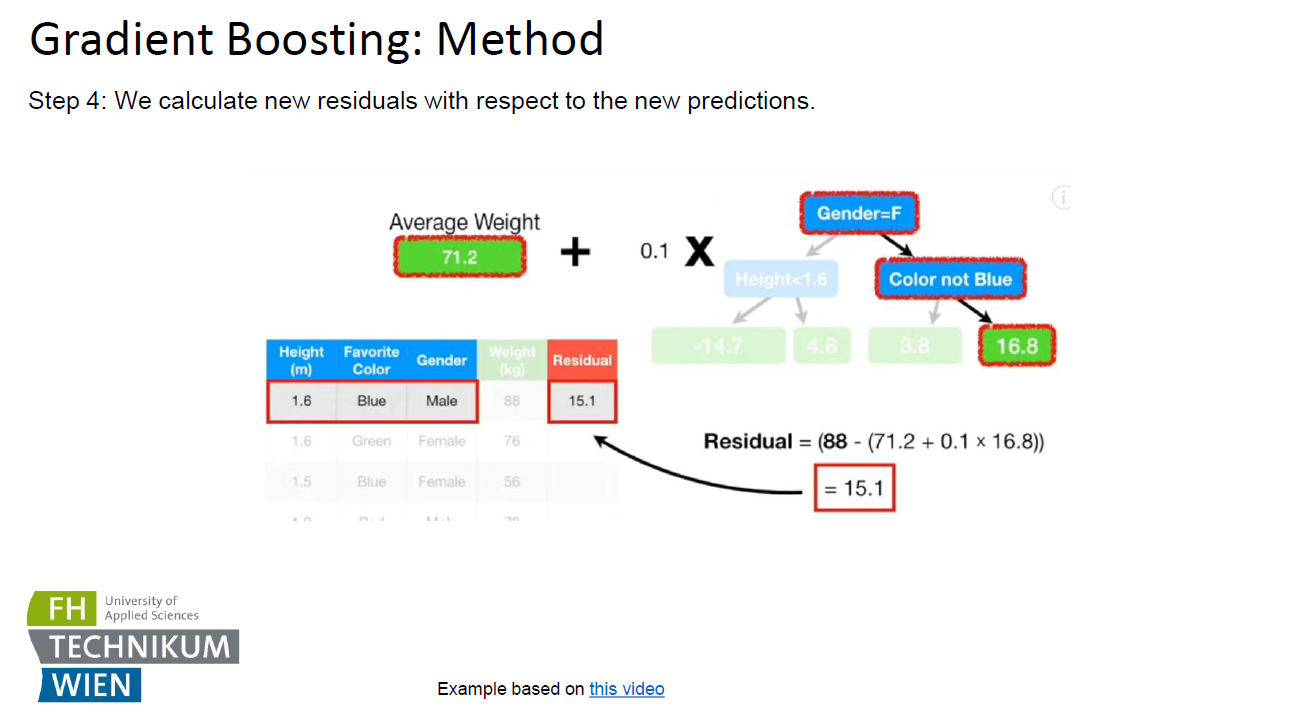

---

**Slide 24: Gradient Boosting – Step 4: Recalculate Residuals**

We now arrive at **Step 4** of the gradient boosting cycle:
👉 **Compute new residuals based on updated predictions.**

### Why?

Because we’ve already improved our prediction once, we now need to **recalculate how wrong we still are**. These new residuals will become the targets for the **next tree**.

---

### Example:

We’re focusing on an observation where:

* Actual weight = **88**
* Previous prediction =

  $$
  71.2 + 0.1 \times 16.8 = 72.88
  $$

So the **new residual** is:

$$
88 - 72.88 = 15.1
$$

This residual tells us: *“We’re still underestimating this person’s weight by 15.1 kg.”*

---

### What's next?

We take these new residuals and train another tree to predict them — just like before. And this cycle continues, **step by step**, until the ensemble can no longer improve significantly.

Let me know when you’re ready to move on!


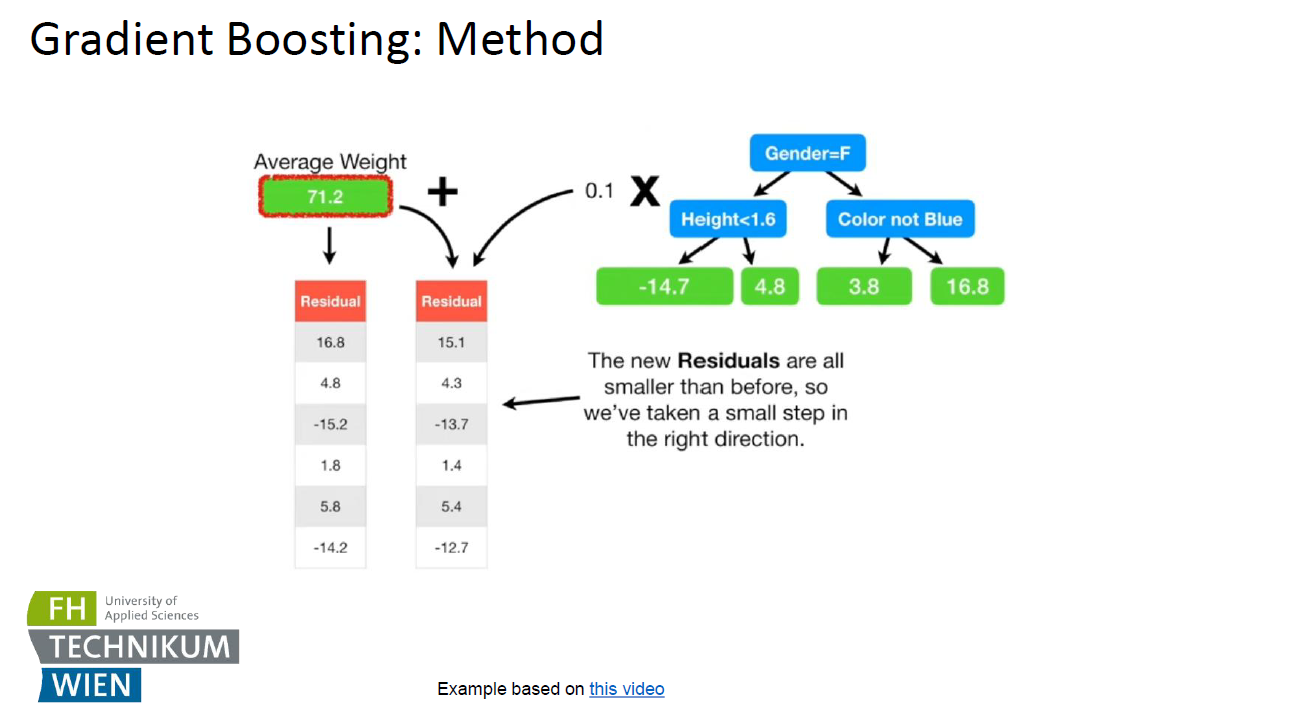

---

**Slide 25: Gradient Boosting – Residuals Are Improving**

Now we step back and **assess the impact of our update** in the gradient boosting cycle.

### What do we observe?

On the left:

* The **initial residuals** before applying the residual tree (large values like ±16.8, ±15.2, etc.)

On the right:

* The **updated residuals** after applying the first tree correction (e.g., 15.1 instead of 16.8, -13.7 instead of -15.2, etc.)

### What does this mean?

✅ **The new residuals are smaller.**
That means the new predictions are **closer to the actual values**.

This confirms:

> We’ve taken a **small but meaningful step** in the right direction — exactly what gradient boosting is designed to do.

### Why this works:

* Thanks to the **learning rate**, we’re not overfitting.
* We’ve **slightly corrected** our model’s prediction.
* We’re ready to **repeat the cycle**: train on the new residuals, add another tree, and update again.

This careful, **iterative improvement** is what gives gradient boosting its **high accuracy and robustness**.

Let me know when you're ready for the next slide!


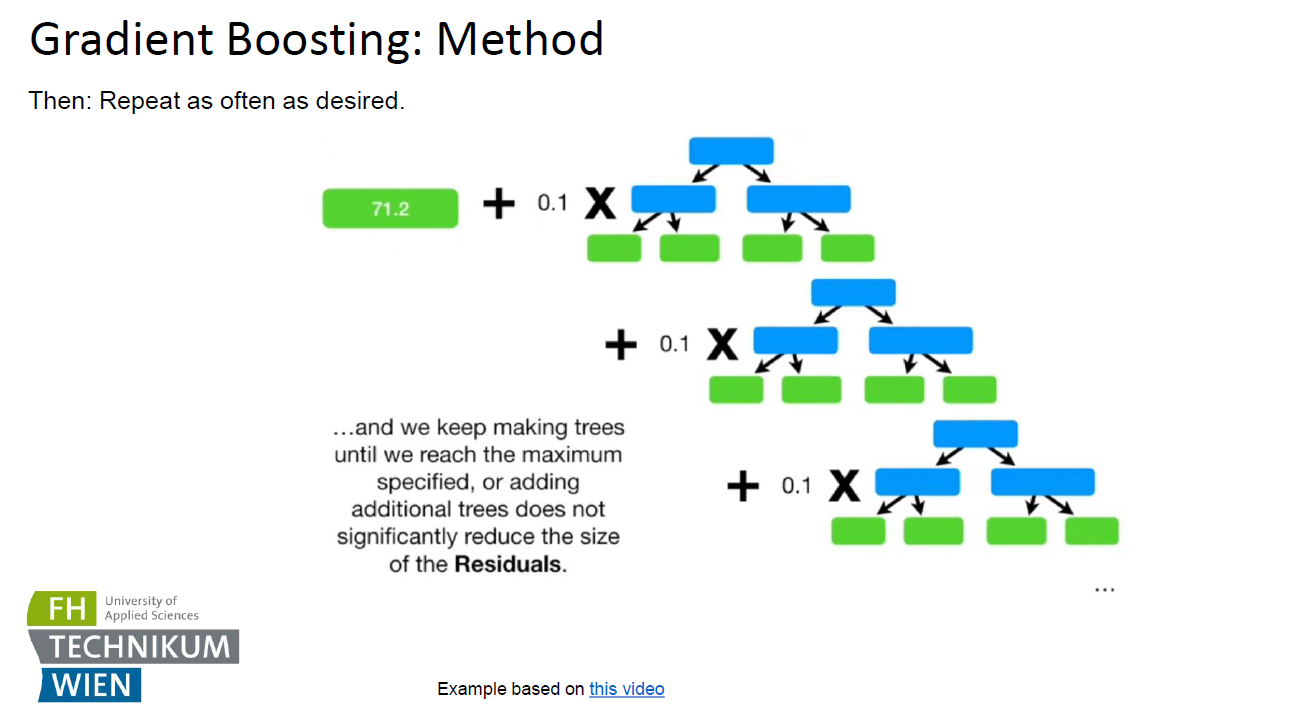

---

**Slide 26: Gradient Boosting – Repeat the Process**

We now conclude the gradient boosting cycle by emphasizing the **repetition of this method**.

### Final Step: Iterate as needed

Gradient Boosting follows this formula:

$$
\text{Final Prediction} = \text{Initial Guess} + \sum_{m=1}^{M} \text{Learning Rate} \times \text{Tree}_m(\text{Residual})
$$

### What happens in practice?

* Start with the **average prediction** (e.g., 71.2).
* Add tree after tree, each trained on the **residuals** of the last prediction.
* **Scale** each tree’s contribution by the **learning rate**.
* Continue until:

  * A **maximum number of trees** is reached, **or**
  * Adding more trees **no longer improves** performance (residuals stop decreasing).

### Why this works:

* Small corrections build on each other.
* Errors shrink with each iteration.
* We move closer and closer to the target.
* With **early stopping**, **regularization**, and **tree depth control**, we avoid overfitting.

> ✅ The result: a strong, accurate, and **robust ensemble model**.

Let me know when you want to proceed to the final slides or performance comparisons!


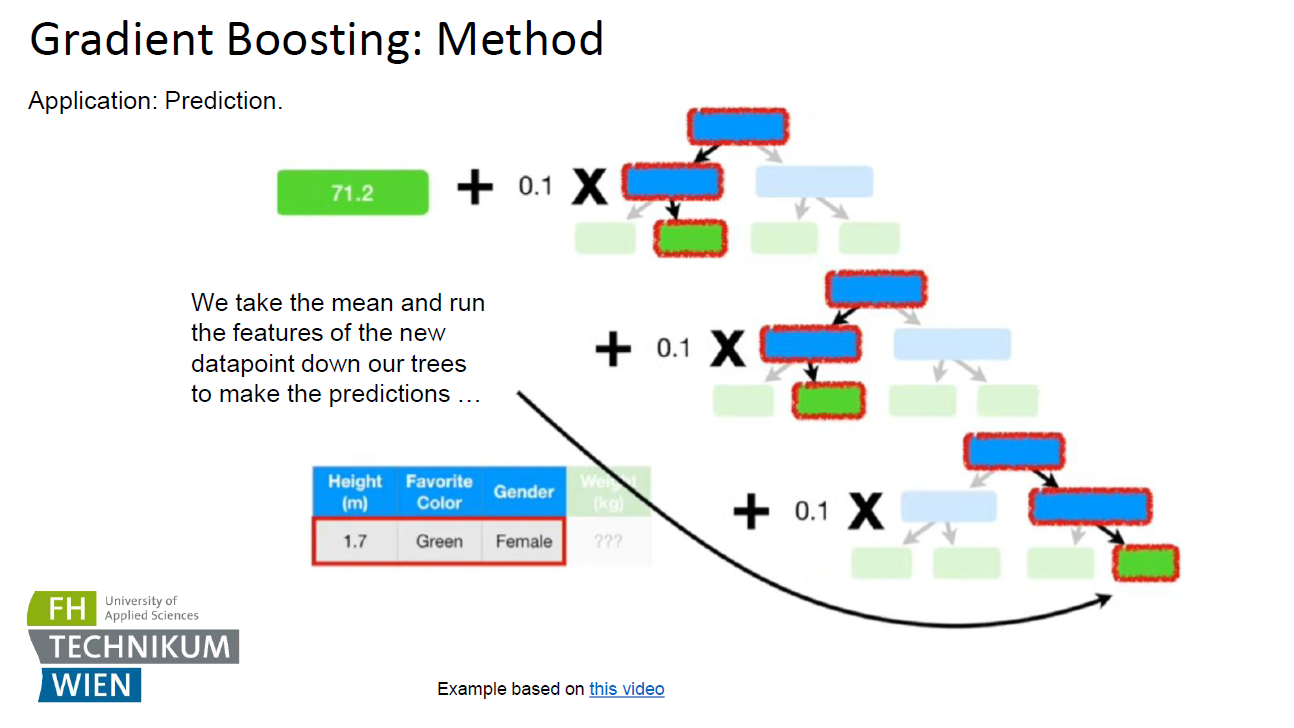

---

**Slide 27: Gradient Boosting – Making a Prediction**

Let’s now see how we use a trained gradient boosting model to make predictions on new data.

---

### Example Input:

We want to predict the weight of a person with:

* **Height**: 1.7 m
* **Favorite Color**: Green
* **Gender**: Female

---

### Prediction Process:

1. **Start with the initial value** (mean of target variable):

   $$
   \text{Initial Prediction} = 71.2
   $$

2. **Run the new data down each tree** in the sequence:

   * Each tree gives us a **leaf value** (a residual correction).
   * Multiply that value by the **learning rate** (0.1 in this example).

3. **Add all corrections** together:

   $$
   \text{Final Prediction} = 71.2 + 0.1 \cdot \text{Tree}_1(\text{features}) + 0.1 \cdot \text{Tree}_2(\text{features}) + \dots
   $$

4. Each tree’s correction helps **refine the estimate**.

---

### Summary:

* This is how gradient boosting **generalizes to unseen data**.
* Each tree looks at the new features and **adjusts the prediction** step by step.
* The final output is the **accumulated improvement** over the base value.

Let me know when you're ready to proceed to the final conclusions or performance comparisons!


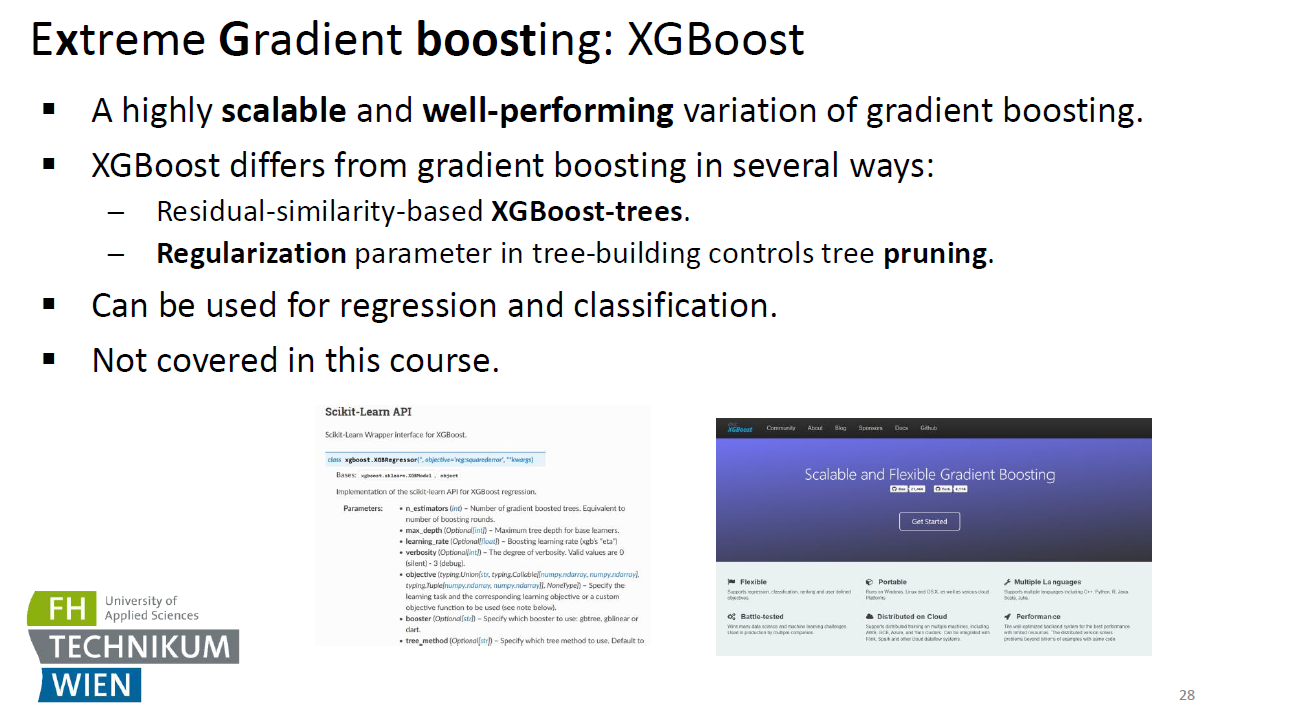

---

**Slide 28: Extreme Gradient Boosting – XGBoost**

To wrap up, let’s briefly introduce **XGBoost**, one of the most powerful and widely used boosting algorithms in practice.

---

### What is XGBoost?

**XGBoost** stands for **eXtreme Gradient Boosting**. It is:

* ⚡ **Highly scalable**
* 🚀 **Well-performing**, especially on large and complex datasets
* 🧠 **Efficiently regularized**, making it harder to overfit

---

### How is it different from basic gradient boosting?

1. **XGBoost-trees**:

   * Trees are built using **residual similarity scores**, not just pure residuals.
   * Optimizes gain with second-order (Newton) approximation.

2. **Built-in Regularization**:

   * Includes **L1 and L2 regularization** terms to penalize model complexity.
   * Prunes trees **proactively** during construction to avoid overfitting.

3. **Additional Features**:

   * Missing value handling.
   * Parallelized tree construction.
   * Built-in cross-validation support.

---

### Use Cases:

✅ **Regression**
✅ **Classification**
✅ Even **ranking** problems (e.g. in search engines)

> 📦 Available in **Scikit-learn** as `xgboost.XGBRegressor` or `XGBClassifier`.

---

⚠️ **Note:** Although XGBoost is *not covered in detail in this course*, it’s definitely worth learning as it’s a **top performer in Kaggle competitions and industry applications**.

Let me know if you want a mini walkthrough of how to implement XGBoost in code — otherwise, we can close the presentation!


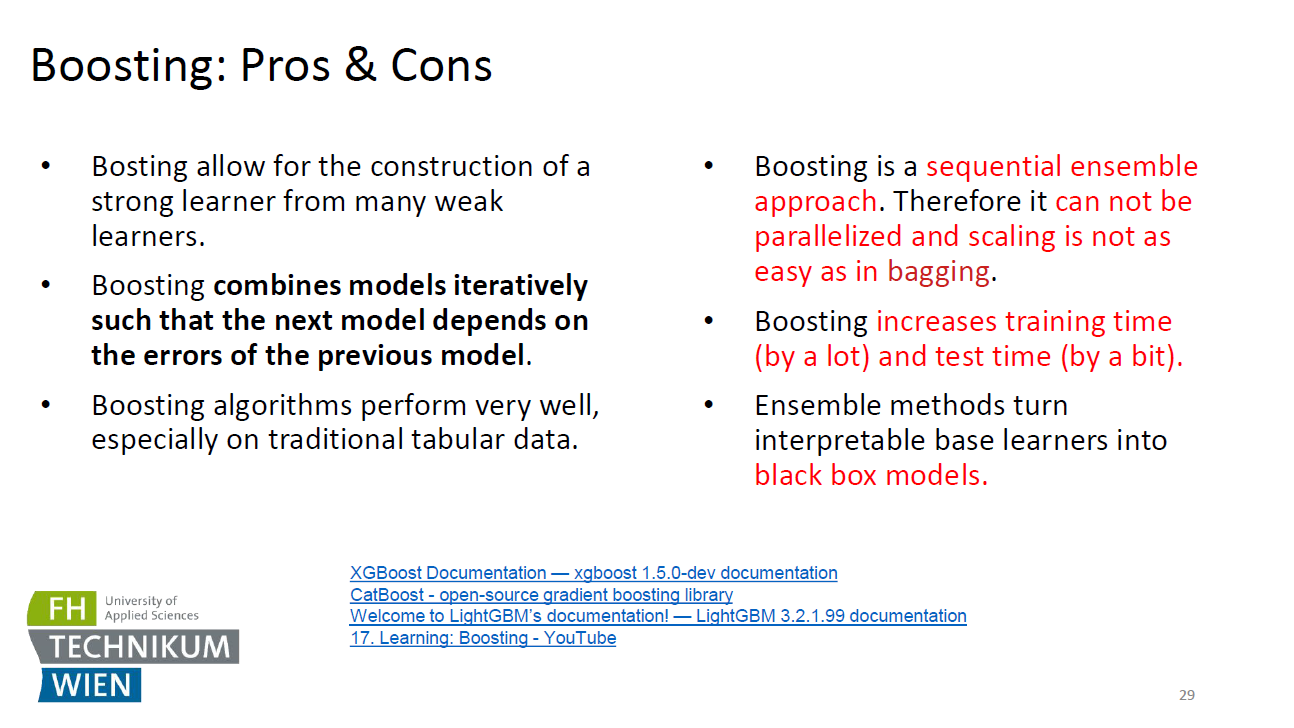

---

**Slide 29: Boosting – Pros & Cons**

Now let’s summarize what we’ve learned by weighing the **advantages and limitations** of boosting methods.

---

### ✅ Pros

* **Constructs strong learners** from many weak learners.
* Uses an **iterative approach**, where each model corrects its predecessor’s mistakes.
* **Excels on tabular data**, which is common in structured business, finance, and healthcare problems.
* Often achieves **state-of-the-art performance** in practice.

---

### ❌ Cons

* Boosting is a **sequential process**, so:

  * ❌ **Cannot be parallelized** like bagging (e.g., Random Forests).
  * ❌ **Slower training** times — especially with many estimators.
  * ❌ **Inference (test) time** is also longer (but usually acceptable).
* Can turn **interpretable models** (e.g., shallow decision trees) into **black box ensembles**.
* Risk of **overfitting** if not carefully regularized.

---

### Additional Resources (linked on slide):

* 🔗 [XGBoost Documentation](https://xgboost.readthedocs.io/)
* 🔗 [CatBoost](https://catboost.ai/)
* 🔗 [LightGBM](https://lightgbm.readthedocs.io/)
* 🎥 [YouTube: Boosting Explained](https://www.youtube.com/watch?v=3CC4N4z3GJc)

---

Let me know if you'd like a closing slide, speaker notes for a recap, or a quiz summary for practice!


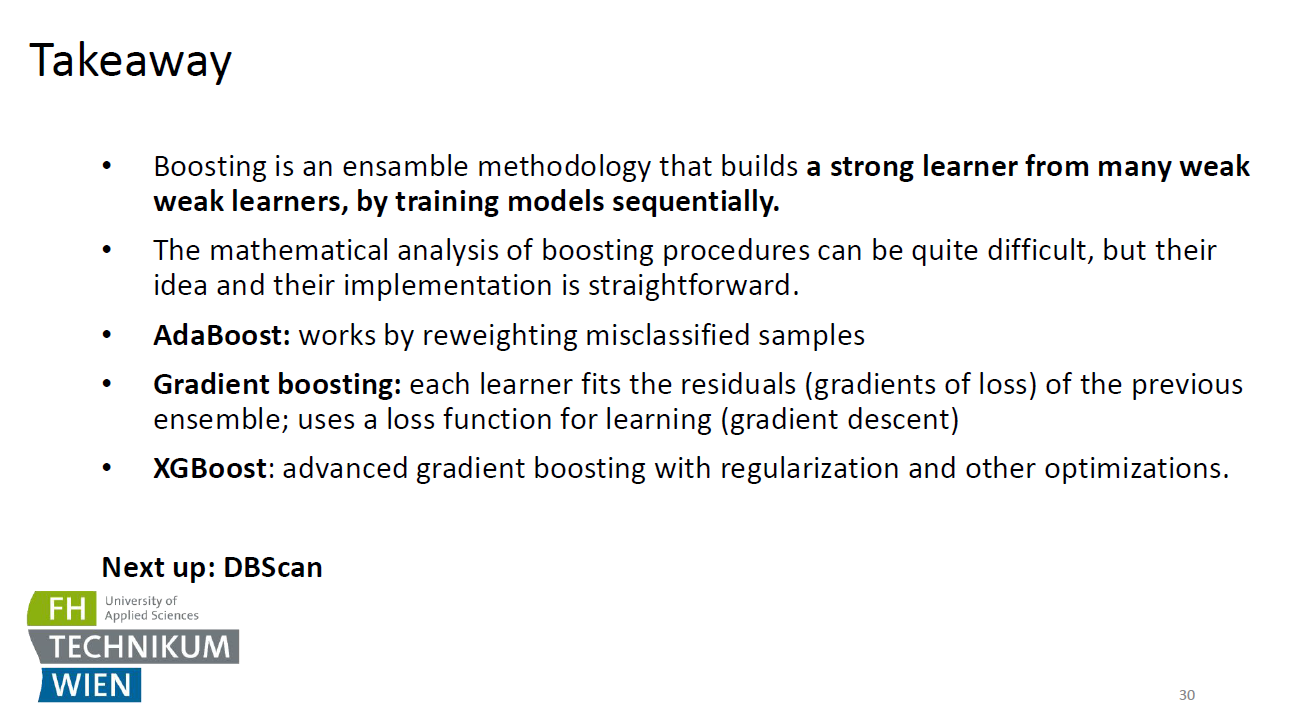

---

**Slide 30: Takeaway – Boosting Summary**

Let’s wrap up what we’ve covered about **Boosting** with some key takeaways:

---

### 🚀 What is Boosting?

* Boosting is an **ensemble learning** technique.
* It builds a **strong learner** by combining **many weak learners**, trained **sequentially**.
* Each new model focuses on the **errors of the previous ones**, improving overall performance.

---

### 🧠 Key Concepts

* **AdaBoost**:
  Reweights misclassified samples → focuses learning on hard cases.

* **Gradient Boosting**:
  Models the **residuals (errors)** from previous learners using gradient descent on a loss function.

* **XGBoost**:
  An **optimized** version of gradient boosting that adds **regularization**, **tree pruning**, and better **computational efficiency**.

---

### 🧾 Final Notes

* While the theory can get complex, **implementing boosting with libraries like `scikit-learn`, `xgboost`, or `lightgbm` is very accessible**.
* Boosting is especially **effective on structured/tabular data**.

---

🔜 **Next Topic: DBScan (Density-Based Spatial Clustering)**

Let me know if you’d like a compact cheat sheet, quiz questions, or slides merged as a PDF.


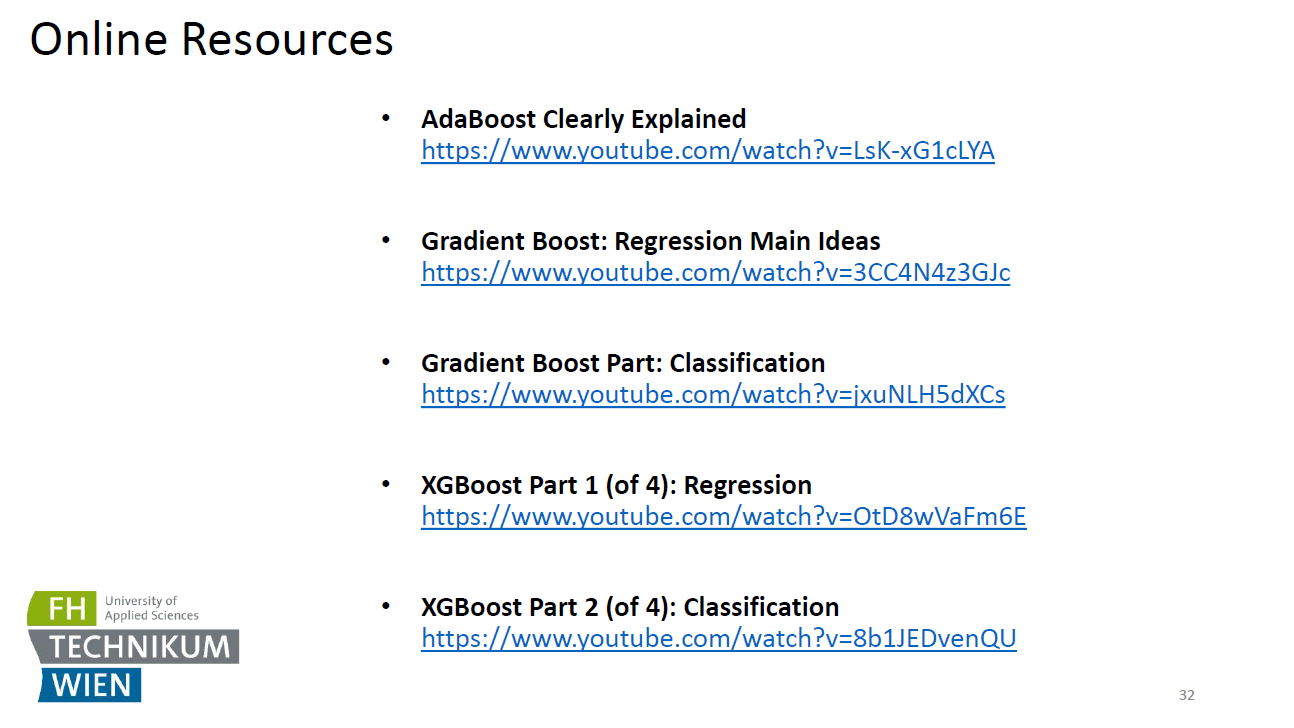

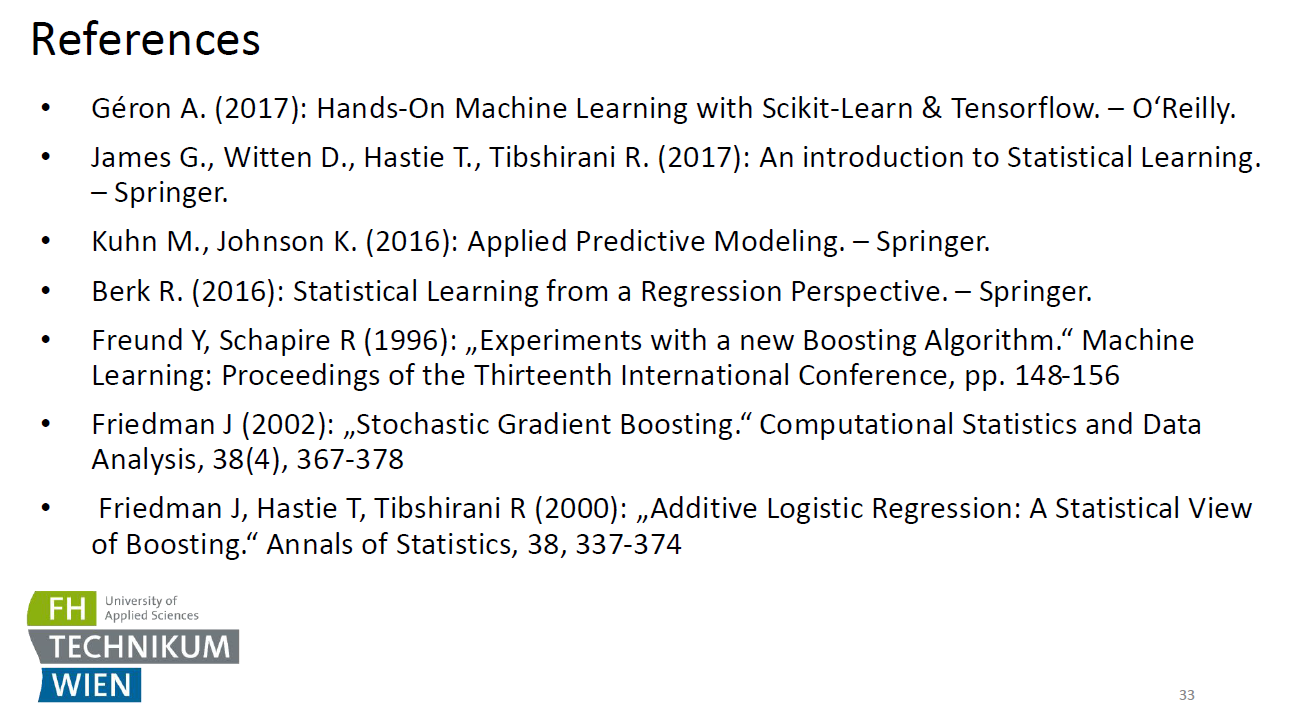